#[Your_name]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [1]:
# type: ignore
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopy.distance import geodesic
import scipy.stats as stats
import geohash
from shapely.geometry import shape
from shapely.geometry import Point
import json

Download data

In [2]:
CBD_boundary = pd.read_csv('chicago-traffic-dataset\chicago-CBD-boundary.csv')
police_beat_boundary = pd.read_csv('chicago-traffic-dataset\chicago-police-beat-boundries.csv')
street_boundary = pd.read_csv('chicago-traffic-dataset\chicago-street-center-lines.csv')
crashes_people = pd.read_csv('chicago-traffic-dataset/traffic-crashes-people.csv')
crashes_vehicles=pd.read_csv('chicago-traffic-dataset/traffic-crashes-vehicles.csv')
crashes = pd.read_csv('chicago-traffic-dataset/traffic-crashes.csv')

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\4220126058.py:4: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_people = pd.read_csv('chicago-traffic-dataset/traffic-crashes-people.csv')
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\4220126058.py:5: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_vehicles=pd.read_csv('chicago-traffic-dataset/traffic-crashes-vehicles.csv')


<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [3]:
# your code here
crashes_people.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN



<div dir="rtl">الاستنتاج<div>

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

## CRASHES_PEOPLE ##

In [4]:
# first of all lets discover the shape of crashes_people data
# discover columns name and count the mesiing values in each column
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1808605, 29)
PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID                 36177
CRASH_DATE                     0
SEAT_NO                  1443028
CITY                      492062
STATE                     472632
ZIPCODE                   600317
SEX                        29978
AGE                       527939
DRIVERS_LICENSE_STATE     748686
DRIVERS_LICENSE_CLASS     922585
SAFETY_EQUIPMENT            5061
AIRBAG_DEPLOYED            34799
EJECTION                   22453
INJURY_CLASSIFICATION        729
HOSPITAL                 1509447
EMS_AGENCY               1623522
EMS_RUN_NO               1777884
DRIVER_ACTION             368819
DRIVER_VISION             369365
PHYSICAL_CONDITION        367836
PEDPEDAL_ACTION          1774170
PEDPEDAL_VISIBILITY      1774235
PEDPEDAL_LOCATION        1774172
BAC_RESULT                367837
BAC_RESULT VALUE         1806583
CELL_PHONE_USE           1807446


FIrst of all let's drop some columns like (STATE and ZIPCODE) the rule of these 2 columns to identify the location just like CITY and we already know that the crashes are in chicago city so lets drop them

In [5]:
crashes_people.drop(["STATE","ZIPCODE"],axis=1, inplace=True)

we notice that there are to much of messing values in different columns.
so let's dive in the data and discover WTF is going here.
let's start with SEAT_NO column. by looking at the data we notice that most messing value in this column has driver person_type so let's be sure about that.  
first we will look at unique values of person types and we will compare between the messing SEAT_NO values and the person type value


In [6]:
unique_per_typ_vals=crashes_people["PERSON_TYPE"].unique()
unique_per_typ_vals


array(['DRIVER', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE'], dtype=object)

In [7]:
crashes_people['mess_seat_no']=None
for typ in list(unique_per_typ_vals):
    crashes_people.loc[(crashes_people['SEAT_NO'].isnull()) & (crashes_people['PERSON_TYPE'] == typ), 'mess_seat_no'] = typ

In [8]:
crashes_people['mess_seat_no'].unique()

array(['DRIVER', None, 'PEDESTRIAN', 'BICYCLE', 'NON-MOTOR VEHICLE',
       'NON-CONTACT VEHICLE'], dtype=object)

In [9]:
for typ in unique_per_typ_vals:
    if typ!="PASSENGER":
        count=crashes_people['mess_seat_no'].value_counts()[typ]
        print(f'count_missing_{typ}_seat_no {count}')
        count_type=crashes_people['PERSON_TYPE'].value_counts()[typ]
        print(f'count_{typ} {count_type}')

count_missing_DRIVER_seat_no 1407381
count_DRIVER 1407381
count_missing_PEDESTRIAN_seat_no 21142
count_PEDESTRIAN 21142
count_missing_BICYCLE_seat_no 12725
count_BICYCLE 12725
count_missing_NON-MOTOR VEHICLE_seat_no 1474
count_NON-MOTOR VEHICLE 1474
count_missing_NON-CONTACT VEHICLE_seat_no 306
count_NON-CONTACT VEHICLE 306


In [10]:
for typ in unique_per_typ_vals:
    if typ!="PASSENGER":
        crashes_people['SEAT_NO'] = np.where(crashes_people['PERSON_TYPE'] == typ, 0 if typ=="DRIVER" else -1, crashes_people['SEAT_NO'])
count_missing_seat_no=crashes_people['SEAT_NO'].isnull().sum()
print(f'Messing SEAT_NO value {count_missing_seat_no}')
crashes_people.drop(['mess_seat_no'],axis=1,inplace=True)


Messing SEAT_NO value 0


We replaced the SEAT_NO messing values of DRIVERS with 0 because that the PASSENGERS have SEAT_NO from 1 to 12 so we considered that the DRIVER has 0 SEAT_NO and THE OTHERS who arent in the vehiacle has -1 SEAT_NO.  

NOW let's move to another column 😁😁

Now let's have a look on Vehicle ID and do the following:  
<ul>
    <li>etrieve the rows where the "VEHICLE_ID" column is NaN (missing). The resulting DataFrame is stored in the variable missing_VID.</li>
    <li>loop over them and update the veihcle id with the value from crashes_vehicle when the crash record ids are equaled</li>
</ul>

In [11]:
print(f'messing values in vehicle id column: {crashes_people["VEHICLE_ID"].isnull().sum()}')
messing_VID=crashes_people[crashes_people["VEHICLE_ID"].isna()]

CRASH_RECORD_IDS=messing_VID["CRASH_RECORD_ID"].tolist()
missing_VIDS = crashes_vehicles[crashes_vehicles['CRASH_RECORD_ID'].isin(CRASH_RECORD_IDS)]
missing_VIDS =missing_VIDS[missing_VIDS["VEHICLE_ID"].notna()]
missing_VIDS = missing_VIDS[["VEHICLE_ID","CRASH_RECORD_ID"]]
vehicle_id_mapping = missing_VIDS.set_index("CRASH_RECORD_ID")["VEHICLE_ID"].to_dict()
crashes_people["VEHICLE_ID"] = crashes_people.apply(
    lambda row: vehicle_id_mapping[row["CRASH_RECORD_ID"]] if( pd.isna(row["VEHICLE_ID"]) and row["CRASH_RECORD_ID"] in vehicle_id_mapping.keys()) else row["VEHICLE_ID"],
    axis=1
)
print(f'messing values in vehicle id column: {crashes_people["VEHICLE_ID"].isnull().sum()}')



messing values in vehicle id column: 36177
messing values in vehicle id column: 168


let's fill the messing values on vehicle_id when the person type is PEDESTRIAN with -1 value which means there is no vehicle

In [12]:
count=((crashes_people["PERSON_TYPE"]=="PEDESTRIAN") & (crashes_people["VEHICLE_ID"].isnull())).sum()
print(f'count of PEDESTRIAN that the VEHICLE_ID is nan is: {count}')
crashes_people['VEHICLE_ID'] = np.where(crashes_people['PERSON_TYPE'] == "PEDESTRIAN", -1, crashes_people['VEHICLE_ID'])
count=((crashes_people["PERSON_TYPE"]=="PEDESTRIAN") & (crashes_people["VEHICLE_ID"].isnull())).sum()
print(f'count of PEDESTRIAN that the VEHICLE_ID is nan is: {count}')

count of PEDESTRIAN that the VEHICLE_ID is nan is: 4
count of PEDESTRIAN that the VEHICLE_ID is nan is: 0


Now let's have a look in CITY column and since we know the crashes are in CHICAGO city let's replace messing values with CHICAGO value.


In [13]:
crashes_people["CITY"]=crashes_people['CITY'].fillna("CHICAGO")
crashes_people['CITY'].isnull().sum()

0

Now let's look at the AGE column and do the following steps:  
<ul>
 <li>store the positive ages in anew column</li>
 <li>calculate the mean of positive ages</li>
 <li>replace negative ages with 0 value</li>
 <li>replace 0 ages with mean value</li>
 <li>replace nan ages with mean value</li>
</ul>

In [14]:
crashes_people['positave_ages']=crashes_people.loc[crashes_people['AGE']>0,'AGE']
mean_of_ages=crashes_people['positave_ages'].mean()
print(f'mean of ages is:{round(mean_of_ages)}')
crashes_people['AGE']=crashes_people['AGE'].apply(lambda x: max(x, 0))
crashes_people['AGE']=crashes_people['AGE'].replace(0,mean_of_ages)
crashes_people['AGE']=crashes_people['AGE'].fillna(mean_of_ages)
crashes_people['AGE'].isnull().sum()


mean of ages is:38


0

Now let's have a look on DRIVERS_LICENSE_STATE and DRIVERS_LICENSE_CLASS  
We Know that for people who aren't drivers they don't need a drivers license so wee will do the following steps:  
<ul>
 <li>create a new column that store (TRUE/FALSE) based on the type of person</li>
 <li>fill nan value in DRIVERS_LICENSE_STATE with not_required if the person type is not driver</li>
 <li>fill nan value in DRIVERS_LICENSE_CLASS with not_required if the person type is not driver</li>
</ul>

In [15]:
crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum()

748686

In [16]:
for typ in unique_per_typ_vals:
    if typ !="DRIVER":
        count=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_STATE"].isnull())).sum()
        count1=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_CLASS"].isnull())).sum()

        print(f'count of {typ} that the DRIVERS_LICENSE_STATE is nan is: {count}')
        print(f'count of {typ} that the DRIVERS_LICENSE_CLASS is nan is: {count1}')

        crashes_people['DRIVERS_LICENSE_STATE'] = np.where(crashes_people['PERSON_TYPE'] == typ, "NOT REQUIRED", crashes_people['DRIVERS_LICENSE_STATE'])
        crashes_people['DRIVERS_LICENSE_CLASS'] = np.where(crashes_people['PERSON_TYPE'] == typ, "NOT REQUIRED", crashes_people['DRIVERS_LICENSE_CLASS'])

        count=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_STATE"].isnull())).sum()
        count1=((crashes_people["PERSON_TYPE"]==typ) & (crashes_people["DRIVERS_LICENSE_CLASS"].isnull())).sum()

        print(f'count of {typ} that the DRIVERS_LICENSE_STATE is nan is: {count}')
        print(f'count of {typ} that the DRIVERS_LICENSE_CLASS is nan is: {count1}')
        print("************************************************************************************")

count of PASSENGER that the DRIVERS_LICENSE_STATE is nan is: 365577
count of PASSENGER that the DRIVERS_LICENSE_CLASS is nan is: 365577
count of PASSENGER that the DRIVERS_LICENSE_STATE is nan is: 0
count of PASSENGER that the DRIVERS_LICENSE_CLASS is nan is: 0
************************************************************************************
count of PEDESTRIAN that the DRIVERS_LICENSE_STATE is nan is: 21142
count of PEDESTRIAN that the DRIVERS_LICENSE_CLASS is nan is: 21142
count of PEDESTRIAN that the DRIVERS_LICENSE_STATE is nan is: 0
count of PEDESTRIAN that the DRIVERS_LICENSE_CLASS is nan is: 0
************************************************************************************
count of BICYCLE that the DRIVERS_LICENSE_STATE is nan is: 12725
count of BICYCLE that the DRIVERS_LICENSE_CLASS is nan is: 12725
count of BICYCLE that the DRIVERS_LICENSE_STATE is nan is: 0
count of BICYCLE that the DRIVERS_LICENSE_CLASS is nan is: 0
****************************************************

Now lets use LIC_PLATE_STATE from crashes_vehicles and try to find DRIVERS_LISANCE_STATE nan value based on the VEHICLE_ID by following steps:  


1.  Take subset of crashes_vehicles that have UNIT_TYPE==DRIVER and LIC_PLATE_STATE not nan.
2.   Take the indexs of rows from crahes_people where PERSON_TYPE==DRIVER and DRIVERS_LICANSE_STATE is nan
3. loop over indexes:
    1. get the VEHICLE_ID from that row in crashes_people
    2. get the row that has the same vehicle_id from the subset of crashes_vehicles.
    3. update DRIVERS_LISANCE_STATE by the value of LIC_PLATE_STATE in that row







In [17]:
to_search=crashes_vehicles.loc[(crashes_vehicles["UNIT_TYPE"]=="DRIVER")&(crashes_vehicles["LIC_PLATE_STATE"].notna())]

This cell take alot of time be patient please 😴

In [18]:
indexes=crashes_people.loc[(crashes_people["PERSON_TYPE"]=="DRIVER") & (crashes_people["DRIVERS_LICENSE_STATE"].isna())].index
for index in indexes.tolist():
  vehicle_id=crashes_people.at[index,"VEHICLE_ID"]
  vehicle_row = to_search.loc[to_search['VEHICLE_ID'] == vehicle_id]
  if not vehicle_row.empty:
            crashes_people.at[index,'DRIVERS_LICENSE_STATE'] = vehicle_row.iloc[0]['LIC_PLATE_STATE']

In [19]:
print(crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].value_counts())

101351
521446
DRIVERS_LICENSE_CLASS
D               771240
NOT REQUIRED    401224
A                31588
C                24198
B                24115
                 ...  
PP                   1
C2                   1
D6                   1
A+                   1
JR                   1
Name: count, Length: 282, dtype: int64


In [20]:
crashes_people['DRIVERS_LICENSE_STATE'] = np.where(((crashes_people['PERSON_TYPE'] == "DRIVER")&crashes_people['DRIVERS_LICENSE_STATE'].isna()), "NOT SET", crashes_people['DRIVERS_LICENSE_STATE'])
crashes_people['DRIVERS_LICENSE_CLASS'] = np.where(((crashes_people['PERSON_TYPE'] == "DRIVER")&crashes_people['DRIVERS_LICENSE_CLASS'].isna()), "NOT SET", crashes_people['DRIVERS_LICENSE_CLASS'])

In [21]:
print(crashes_people["DRIVERS_LICENSE_STATE"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].isnull().sum())
print(crashes_people["DRIVERS_LICENSE_CLASS"].value_counts())
print(crashes_people["DRIVERS_LICENSE_STATE"].value_counts())

0
0
DRIVERS_LICENSE_CLASS
D               771240
NOT SET         521446
NOT REQUIRED    401224
A                31588
C                24198
                 ...  
PP                   1
C2                   1
D6                   1
A+                   1
JR                   1
Name: count, Length: 283, dtype: int64
DRIVERS_LICENSE_STATE
IL              1182591
NOT REQUIRED     401224
NOT SET          101351
XX                45582
IN                21883
                 ...   
LU                    1
SL                    1
ES                    1
GM                    1
YU                    1
Name: count, Length: 212, dtype: int64


In [22]:
crashes_people.drop(["HOSPITAL","EMS_AGENCY","EMS_RUN_NO","PEDPEDAL_ACTION"
                    ,"PEDPEDAL_VISIBILITY","PEDPEDAL_LOCATION",
                    "BAC_RESULT VALUE","CELL_PHONE_USE","positave_ages"]
                    ,axis=1, inplace=True)

In [23]:
res=crashes_people["SAFETY_EQUIPMENT"].where(crashes_people["PERSON_TYPE"]=="PEDESTRIAN")
res.unique()

array([nan, 'NONE PRESENT', 'USAGE UNKNOWN', 'WHEELCHAIR',
       'SAFETY BELT NOT USED', 'SAFETY BELT USED', 'HELMET NOT USED',
       'HELMET USED', 'CHILD RESTRAINT - FORWARD FACING',
       'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)',
       'CHILD RESTRAINT USED', 'STRETCHER',
       'CHILD RESTRAINT - TYPE UNKNOWN', 'CHILD RESTRAINT NOT USED',
       'DOT COMPLIANT MOTORCYCLE HELMET', 'BOOSTER SEAT'], dtype=object)

In [24]:
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1808605, 19)
PERSON_ID                     0
PERSON_TYPE                   0
CRASH_RECORD_ID               0
VEHICLE_ID                  164
CRASH_DATE                    0
SEAT_NO                       0
CITY                          0
SEX                       29978
AGE                           0
DRIVERS_LICENSE_STATE         0
DRIVERS_LICENSE_CLASS         0
SAFETY_EQUIPMENT           5061
AIRBAG_DEPLOYED           34799
EJECTION                  22453
INJURY_CLASSIFICATION       729
DRIVER_ACTION            368819
DRIVER_VISION            369365
PHYSICAL_CONDITION       367836
BAC_RESULT               367837


After having a look on DRIVER_ACTION and DRIVER_VISION and PHYSICAL_CONDITION and BAC_RESULT we noticed that all PERSON_TYPE values of NAN values of these column is PASSENGER and that is logical because these columns provide infos a bout DRIVER so we will fill the NAN values of these columns with IS_NOT_DRIVER

In [25]:
crashes_people['DRIVER_ACTION'] = np.where(crashes_people['PERSON_TYPE'] != "DRIVER", "IS_NOT_DRIVER", crashes_people['DRIVER_ACTION'])
crashes_people['DRIVER_VISION'] = np.where(crashes_people['PERSON_TYPE'] != "DRIVER", "IS_NOT_DRIVER", crashes_people['DRIVER_VISION'])
crashes_people['PHYSICAL_CONDITION'] = np.where(crashes_people['PERSON_TYPE'] != "DRIVER", "IS_NOT_DRIVER", crashes_people['PHYSICAL_CONDITION'])
crashes_people['BAC_RESULT'] = np.where(crashes_people['PERSON_TYPE'] != "DRIVER", "IS_NOT_DRIVER", crashes_people['BAC_RESULT'])



In [26]:
crashes_people=crashes_people.dropna()

In [27]:
print(f'shape is {crashes_people.shape}')
print(crashes_people.isnull().sum().to_string())

shape is (1744683, 19)
PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
VEHICLE_ID               0
CRASH_DATE               0
SEAT_NO                  0
CITY                     0
SEX                      0
AGE                      0
DRIVERS_LICENSE_STATE    0
DRIVERS_LICENSE_CLASS    0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0


## CRASHES ##

In [28]:
print(f'shape is {crashes.shape}')
print(crashes.isnull().sum().to_string())

shape is (823957, 47)
CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 762398
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         624947
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24578
CRASH_TYPE                            0
INTERSECTION_RELATED_I           635017
NOT_RIGHT_OF_WAY_I               785972
HIT_AND_RUN_I                    565983
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION  

In [29]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


Frst of all we dropped columns that have high missing values 

In [30]:
crashes.drop(columns=['CRASH_DATE_EST_I','LANE_CNT','INTERSECTION_RELATED_I',
                              'HIT_AND_RUN_I','NOT_RIGHT_OF_WAY_I','PHOTOS_TAKEN_I',
                              'STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE',
                              'WORKERS_PRESENT_I','INJURIES_UNKNOWN'], inplace=True)

In [31]:
categorical_columns = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                       'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE' ,'PRIM_CONTRIBUTORY_CAUSE',
                       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
                       'STREET_NAME', 'MOST_SEVERE_INJURY', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK','CRASH_MONTH']
types = {col: 'category' for col in categorical_columns}
crashes=crashes.astype(types)

the STREET_NAME has one null value so we dropped it

In [32]:
crashes.dropna(subset=['STREET_NAME'], inplace=True)

we are filling the missing values in LATITUDE and LONGITUDE using STREET_NAME , first let's see what we have in them

In [33]:
null_value_count = crashes[(crashes['LATITUDE'].isnull()) & (crashes['LONGITUDE'].isnull()) & (crashes['LOCATION'].isnull())].shape[0]
count1 = crashes[(crashes['LATITUDE']==0) & (crashes['LONGITUDE']==0) & (crashes['LOCATION']=='POINT (0 0)')].shape[0]
count2 = crashes[(crashes['LATITUDE']==0) | (crashes['LONGITUDE']==0) | (crashes['LOCATION']=='POINT (0 0)')].shape[0]

print(f'number of crashes with null values in LATITUDE and LONGITUDE and LOCATION : {count1}')
print(f'number of crashes with LATITUDE and LONGITUDE and LOCATION equal to 0 : {count1}')
print(f'number of crashes with LATITUDE or LONGITUDE or LOCATION equal to 0 : {count2}')

number of crashes with null values in LATITUDE and LONGITUDE and LOCATION : 49
number of crashes with LATITUDE and LONGITUDE and LOCATION equal to 0 : 49
number of crashes with LATITUDE or LONGITUDE or LOCATION equal to 0 : 49


we see that the null and zero values are shared between the three columns . we'll replace the zero with None to fill them later

In [34]:
crashes['LATITUDE'] = crashes['LATITUDE'].replace(0, None)
crashes['LONGITUDE'] = crashes['LONGITUDE'].replace(0, None)
crashes['LOCATION'] = crashes['LOCATION'].replace('POINT (0 0)', None)

first lets try to fill the null values using STREET_NAME, we calculate the mean of LATITUDE and LONGITUDE for each street and then fill that street missing values with it's mean .

In [35]:
pd.set_option('future.no_silent_downcasting', True)

mean_coords_by_street_name = crashes.groupby('STREET_NAME', observed=True)[['LATITUDE', 'LONGITUDE']].mean()

for street_name, mean_values in mean_coords_by_street_name.iterrows():
    crashes.loc[crashes['STREET_NAME'] == street_name, 'LATITUDE'] = crashes.loc[crashes['STREET_NAME'] == street_name, 'LATITUDE'].fillna(mean_values['LATITUDE']).infer_objects(copy=False)
    crashes.loc[crashes['STREET_NAME'] == street_name, 'LONGITUDE'] = crashes.loc[crashes['STREET_NAME'] == street_name, 'LONGITUDE'].fillna(mean_values['LONGITUDE']).infer_objects(copy=False)

In [36]:
crashes[(crashes['LATITUDE'].isnull())].shape[0]

2227

there is still missing values , let's try using the STREET_NO to fill the remaining values the same way with STREET_NAME

In [37]:
mean_coords_by_street_no = crashes.groupby('STREET_NO')[['LATITUDE', 'LONGITUDE']].mean()

for street_name, mean_values in mean_coords_by_street_no.iterrows():
    crashes.loc[crashes['STREET_NO'] == street_name, 'LATITUDE'] = crashes.loc[crashes['STREET_NO'] == street_name, 'LATITUDE'].fillna(mean_values['LATITUDE'])
    crashes.loc[crashes['STREET_NO'] == street_name, 'LONGITUDE'] = crashes.loc[crashes['STREET_NO'] == street_name, 'LONGITUDE'].fillna(mean_values['LONGITUDE'])

In [38]:
crashes[(crashes['LATITUDE'].isnull())].shape[0]

6

we are left with 6 missing values, we'll drop them since they won't affect the data and we will combine the LONGITUDE and LATITUDE into LOCATION

In [39]:
crashes.dropna(subset=['LATITUDE'], inplace=True)
crashes['LOCATION'] = crashes.apply(
    lambda row: f"POINT ({row['LONGITUDE']} {row['LATITUDE']})" if pd.isnull(row['LOCATION']) else row['LOCATION'],
    axis=1)
crashes['LATITUDE'] = crashes['LATITUDE'].round(9)
crashes['LONGITUDE'] = crashes['LONGITUDE'].round(9)

In [40]:
crashes[crashes['STREET_DIRECTION'].isnull()].shape[0]

3

STREET_DIRECTION have 3 missing values so we'll drop them

In [41]:
crashes.dropna(subset=['STREET_DIRECTION'], inplace=True)

we'll fill the REPORT_TYPE with the most frequent value for each street name 

In [42]:
ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
max_ratio_streets = ratio_df.groupby('STREET_NAME').idxmax()
highest_ratio_report_type = max_ratio_streets.apply(lambda x: np.nan if pd.isnull(x) else x[1])
crashes['REPORT_TYPE'] = crashes.apply(lambda row: highest_ratio_report_type[row['STREET_NAME']] if pd.isnull(row['REPORT_TYPE']) else row['REPORT_TYPE'], axis=1)

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1103507738.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1103507738.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_df = crashes.groupby(['STREET_NAME', 'REPORT_TYPE']).size() / crashes.groupby('STREET_NAME').size()
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1103507738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

the function below is to calculate the most frequent value of column for each value of another column and we will use it to fill the left missing values in crashes table

In [43]:
def replace_most_common(df, base_column, target_column):
    most_common = df.groupby(base_column)[target_column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

    most_common_dict = most_common.to_dict()

    df[target_column] = df.apply(
        lambda row: most_common_dict[row[base_column]] if pd.isnull(row[target_column]) else row[target_column],
        axis=1
    )
    return df


In [44]:
crashes=replace_most_common(crashes, 'STREET_NAME', 'BEAT_OF_OCCURRENCE')
crashes=replace_most_common(crashes, 'PRIM_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY')

inj=['INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION']
base= 'MOST_SEVERE_INJURY'
for tar in inj:
    crashes=replace_most_common(crashes, base, tar)

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\335784117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common = df.groupby(base_column)[target_column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\335784117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common = df.groupby(base_column)[target_column].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


In [45]:
print(crashes.isnull().sum().to_string())

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATI

## CRASHES_VEHICLES ##

In [46]:
print(f'shape is {crashes_vehicles.shape}')
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.head()

shape is (1680892, 70)
CRASH_UNIT_ID                     0
CRASH_RECORD_ID                   0
CRASH_DATE                        0
UNIT_NO                           0
UNIT_TYPE                      2150
VEHICLE_ID                    38473
CMRC_VEH_I                  1649615
MAKE                          38478
MODEL                         38623
LIC_PLATE_STATE              188917
VEHICLE_YEAR                 301958
VEHICLE_DEFECT                38473
VEHICLE_TYPE                  38473
VEHICLE_USE                   38473
TRAVEL_DIRECTION              38473
MANEUVER                      38473
TOWED_I                     1472365
FIRE_I                      1679517
OCCUPANT_CNT                  38473
EXCEED_SPEED_LIMIT_I        1678495
TOWED_BY                    1524003
TOWED_TO                    1584546
AREA_00_I                   1623152
AREA_01_I                   1231298
AREA_02_I                   1414448
AREA_03_I                   1519765
AREA_04_I                   1520419
AREA_

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NaN,NISSAN,SENTRA,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,1634978.0,NaN,CHRYSLER,SEBRING,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,1634948.0,NaN,SUBARU,OUTBACK,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,1637401.0,NaN,TOYOTA,RAV4,IL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,1637408.0,NaN,SUBARU,OUTBACK,OK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a look on UNIT_TYP column

In [47]:
print(crashes_vehicles['UNIT_TYPE'].value_counts())
print(f'messing values count is :{crashes_vehicles["UNIT_TYPE"].isnull().sum()}')

UNIT_TYPE
DRIVER                 1407381
PARKED                  221654
PEDESTRIAN               21142
DRIVERLESS               13803
BICYCLE                  12725
NON-MOTOR VEHICLE         1474
NON-CONTACT VEHICLE        306
DISABLED VEHICLE           250
EQUESTRIAN                   7
Name: count, dtype: int64
messing values count is :2150


After having a look on UNIT_ID with CRASH_DATE columns we

notices that there are duplicated rows so let's dive in and discover what is that and do the following steps:  


1.   merge LOCATION , UNIT_NO and CRASH_DATE based on CRASH_DATE column from crashes and crashes_vehicles
2.   convert the location values to comparable values
3.   find the duplicated rows (the same unit id and the same location at the same time)
4.   return the CRASH_DATE and UNIT_ID as a result data frame



In [48]:
merged_df = pd.merge(crashes[["CRASH_DATE","LOCATION"]], crashes_vehicles[["CRASH_DATE","UNIT_NO"]], on='CRASH_DATE')
merged_df['LOCATION'] = merged_df['LOCATION'].str.extract(r'\((.*?)\)')
duplicates_df = merged_df[merged_df.duplicated(subset=['LOCATION', 'CRASH_DATE',"UNIT_NO"], keep=False)]
result_df = duplicates_df[['CRASH_DATE', 'UNIT_NO']]

Create a mask that check if the crashes_vehicles row has  
CRASH_DATE , UNIT_NO that are in result_df

In [49]:
mask = crashes_vehicles['CRASH_DATE'].isin(result_df['CRASH_DATE']) & crashes_vehicles['UNIT_NO'].isin(result_df['UNIT_NO'])




1.    Create a column to represent the duplicate status of each row
2.   Sort the DataFrame by the 'is_duplicate' column in descending order
3. Drop duplicate rows while keeping the first occurrence of each unique combination of 'CRASH_DATE' and 'UNIT_NO'
4. Remove the 'is_duplicate' column



In [50]:
print(crashes_vehicles.shape)
crashes_vehicles['is_duplicate'] = mask
crashes_vehicles.sort_values('is_duplicate', ascending=False, inplace=True)
crashes_vehicles.drop_duplicates(subset=['CRASH_DATE', 'UNIT_NO'], keep='first', inplace=True)
print(crashes_vehicles.shape)


(1680892, 70)
(1126125, 71)


Let's have a look at the column MAKE

In [51]:
MAKE=crashes_vehicles["MAKE"]
print(MAKE.value_counts())
print(f"nan values count:{MAKE.isnull().sum()}")

MAKE
CHEVROLET                                                       129541
FORD                                                            111479
UNKNOWN                                                          99896
NISSAN                                                           89536
HONDA                                                            80729
                                                                 ...  
WARD INDUSTRIES                                                      1
AERO LINER COMPANY                                                   1
"IMPERIAL -- CODES BELOW ARE ONLY FOR 1980 AND EARLIER MODEL         1
MELROE DIVISION CLARK EQUIPMENT COMPANY (FARGO, ND)                  1
TOWNER MANUFACTURING COMPANY                                         1
Name: count, Length: 1147, dtype: int64
nan values count:26954


We Notice that all messing values in MAKE columns are also messing in MODEL AND VEHICLE_ID it's like a noise or useless data that have been added to the data let's amke sure about it.


In [52]:
result =crashes_vehicles[crashes_vehicles["MAKE"].isnull()]
sub_res=result[["MAKE","MODEL","VEHICLE_ID"]]
print(sub_res.isnull().sum().to_string())

MAKE          26954
MODEL         26951
VEHICLE_ID    26950


In [53]:
print(result.isnull().sum().to_string())

CRASH_UNIT_ID                   0
CRASH_RECORD_ID                 0
CRASH_DATE                      0
UNIT_NO                         0
UNIT_TYPE                     835
VEHICLE_ID                  26950
CMRC_VEH_I                  26954
MAKE                        26954
MODEL                       26951
LIC_PLATE_STATE             26950
VEHICLE_YEAR                26950
VEHICLE_DEFECT              26950
VEHICLE_TYPE                26950
VEHICLE_USE                 26950
TRAVEL_DIRECTION            26950
MANEUVER                    26950
TOWED_I                     26953
FIRE_I                      26954
OCCUPANT_CNT                26950
EXCEED_SPEED_LIMIT_I        26954
TOWED_BY                    26953
TOWED_TO                    26953
AREA_00_I                   26954
AREA_01_I                   26952
AREA_02_I                   26952
AREA_03_I                   26953
AREA_04_I                   26953
AREA_05_I                   26953
AREA_06_I                   26951
AREA_07_I     

SOo let's see what are the unit types of those vehicles

In [54]:
result["UNIT_TYPE"].value_counts()

UNIT_TYPE
PEDESTRIAN             15611
BICYCLE                 8825
NON-MOTOR VEHICLE       1080
DRIVER                   394
NON-CONTACT VEHICLE      102
PARKED                    88
DRIVERLESS                13
EQUESTRIAN                 5
DISABLED VEHICLE           1
Name: count, dtype: int64

We notice that the type of those units are not MAKEABLE so it's logical for model and make to be nan.  
what we will do now is :
1. fill the make and the model for humans (PEDESTRIAN) with values like (MAKE: "GOD" ,MODEL: "HUMAN"😅😁)
2. fill the make and model values for other types like (BICYCLE,NON-MOTOR VEHICLE,....etc) with "UNIDENTIFIED" for ex.
3. for vehicle_id just as what we did in crashes_people we will assign -1 for these unit types.

In [55]:
for unit_type in result["UNIT_TYPE"].unique():
    if unit_type == "PEDESTRIAN":
        crashes_vehicles['MAKE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "GOD", crashes_vehicles['MAKE'])
        crashes_vehicles['MODEL'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "HUMAN", crashes_vehicles['MODEL'])
        crashes_vehicles['VEHICLE_ID'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1 , crashes_vehicles['VEHICLE_ID'])
    elif unit_type != "DRIVER":
        crashes_vehicles['MAKE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['MAKE'])
        crashes_vehicles['MODEL'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['MODEL'])
        crashes_vehicles['VEHICLE_ID'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_ID'])


Now lets take another look in the result to see the remaning missing value based on the unit type

In [56]:
result=crashes_vehicles[["VEHICLE_YEAR","VEHICLE_DEFECT","VEHICLE_TYPE","VEHICLE_USE","TRAVEL_DIRECTION","MANEUVER","UNIT_TYPE"]]
print(result.isnull().sum().to_string())

VEHICLE_YEAR        191627
VEHICLE_DEFECT       26950
VEHICLE_TYPE         26950
VEHICLE_USE          26950
TRAVEL_DIRECTION     26950
MANEUVER             26950
UNIT_TYPE              843


In [57]:
result=result.loc[result["VEHICLE_TYPE"].isnull() & result["VEHICLE_USE"].isnull() & result["TRAVEL_DIRECTION"].isnull() & result["VEHICLE_DEFECT"].isnull() & result["MANEUVER"].isnull() & result["VEHICLE_YEAR"].isnull()]
result["UNIT_TYPE"].value_counts()

UNIT_TYPE
PEDESTRIAN             15611
BICYCLE                 8825
NON-MOTOR VEHICLE       1080
DRIVER                   390
NON-CONTACT VEHICLE      102
PARKED                    88
DRIVERLESS                13
EQUESTRIAN                 5
DISABLED VEHICLE           1
Name: count, dtype: int64

As the previous note we will apply the same logic on those columns

In [58]:
for unit_type in result["UNIT_TYPE"].unique():
    if unit_type != "DRIVER":
        crashes_vehicles['VEHICLE_TYPE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED" if unit_type != "PEDESTRIAN" else "HUMAN", crashes_vehicles['VEHICLE_TYPE'])
        crashes_vehicles['VEHICLE_USE'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, "UNIDENTIFIED", crashes_vehicles['VEHICLE_USE'])
        crashes_vehicles['TRAVEL_DIRECTION'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['TRAVEL_DIRECTION'])
        crashes_vehicles['VEHICLE_DEFECT'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_DEFECT'])
        crashes_vehicles['MANEUVER'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['MANEUVER'])
        crashes_vehicles['VEHICLE_YEAR'] = np.where(crashes_vehicles['UNIT_TYPE'] == unit_type, -1, crashes_vehicles['VEHICLE_YEAR'])



In [59]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID                     0
CRASH_RECORD_ID                   0
CRASH_DATE                        0
UNIT_NO                           0
UNIT_TYPE                       843
VEHICLE_ID                     1225
CMRC_VEH_I                  1104328
MAKE                           1229
MODEL                          1313
LIC_PLATE_STATE              118216
VEHICLE_YEAR                 156188
VEHICLE_DEFECT                 1225
VEHICLE_TYPE                   1225
VEHICLE_USE                    1225
TRAVEL_DIRECTION               1225
MANEUVER                       1225
TOWED_I                      964816
FIRE_I                      1125004
OCCUPANT_CNT                  26950
EXCEED_SPEED_LIMIT_I        1124271
TOWED_BY                    1004116
TOWED_TO                    1050838
AREA_00_I                   1087190
AREA_01_I                    812897
AREA_02_I                    942284
AREA_03_I                   1016819
AREA_04_I                   1016125
AREA_05_I                   

WE notice that there are many columns has kinda the same count of messing values  
lets drop columns that has 75% messing value then descover what is going here

In [60]:
null_percent = crashes_vehicles.isnull().mean() * 100
columns_to_drop = null_percent[null_percent >= 75].index
crashes_vehicles.drop(columns=columns_to_drop, inplace=True)

In [61]:
print(f'shape is {crashes_vehicles.shape}')
print(crashes_vehicles.isnull().sum().to_string())

shape is (1126125, 19)
CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                 843
VEHICLE_ID               1225
MAKE                     1229
MODEL                    1313
LIC_PLATE_STATE        118216
VEHICLE_YEAR           156188
VEHICLE_DEFECT           1225
VEHICLE_TYPE             1225
VEHICLE_USE              1225
TRAVEL_DIRECTION         1225
MANEUVER                 1225
OCCUPANT_CNT            26950
AREA_01_I              812897
FIRST_CONTACT_POINT     28939
is_duplicate                0


lets take the rows when the VEHICLE_DEFECT is null

In [62]:
result=crashes_vehicles[crashes_vehicles["VEHICLE_DEFECT"].isnull()]
print(result.isnull().sum().to_string())

CRASH_UNIT_ID             0
CRASH_RECORD_ID           0
CRASH_DATE                0
UNIT_NO                   0
UNIT_TYPE               835
VEHICLE_ID             1225
MAKE                   1225
MODEL                  1225
LIC_PLATE_STATE        1225
VEHICLE_YEAR           1225
VEHICLE_DEFECT         1225
VEHICLE_TYPE           1225
VEHICLE_USE            1225
TRAVEL_DIRECTION       1225
MANEUVER               1225
OCCUPANT_CNT           1225
AREA_01_I              1225
FIRST_CONTACT_POINT    1225
is_duplicate              0


We can see the most of row values is nan so we can remove them

In [63]:
crashes_vehicles=crashes_vehicles[crashes_vehicles["VEHICLE_DEFECT"].notna()]
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR           154963
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
AREA_01_I              811672
FIRST_CONTACT_POINT     27714
is_duplicate                0


let's drop AREA_01_I column

In [64]:
crashes_vehicles.drop(["AREA_01_I"],axis=1,inplace=True)
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR           154963
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
FIRST_CONTACT_POINT     27714
is_duplicate                0


let's have a look on vehicle_year column

In [65]:
result=crashes_vehicles["VEHICLE_YEAR"]
print(result.min())
print(result.max())
unique_values=result.unique().tolist()
print(sorted(unique_values))

-1.0
9999.0
[-1.0, 1900.0, 1901.0, 1902.0, 1905.0, 1911.0, 1929.0, 1939.0, 1941.0, 1951.0, 1952.0, 1953.0, 1954.0, 1957.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2015.0, nan, 2011.0, 2012.0, 2014.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0, 2025.0, 2026.0, 2027.0, 2028.0, 2029.0, 2030.0, 2031.0, 2032.0, 2033.0, 2034.0, 2040.0, 2041.0, 2044.0, 2045.0, 2047.0, 2048.0, 2049.0, 2054.0, 2055.0, 2066.0, 2071.0, 2077.0, 2088.0, 2095.0, 2096.0, 2097.0, 2099.0, 2100.0, 2101.0, 2102.0, 2103.0, 2104.0, 2105.0, 2106.0, 2107.0, 2108.0, 2109.0, 2110.0, 2112.0, 2113.0, 2115.0, 2116.0, 2117.0, 

we can see that there are alot of un logical years like 9999 so we will replace values like those  or all years those are greater than 2024 with -1 to notify unknown values with nan values.

In [66]:
crashes_vehicles.loc[crashes_vehicles["VEHICLE_YEAR"]>2024 ,'VEHICLE_YEAR']=-1
result=crashes_vehicles["VEHICLE_YEAR"]
print(result.min())
print(result.max())
unique_values=result.unique().tolist()
print(sorted(unique_values))
crashes_vehicles["VEHICLE_YEAR"].isnull().sum()

-1.0
2024.0
[-1.0, 1900.0, 1976.0, 1979.0, 1984.0, 1985.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2013.0, 2015.0, nan, 1901.0, 1902.0, 1905.0, 1911.0, 1929.0, 1939.0, 1941.0, 1951.0, 1952.0, 1953.0, 1954.0, 1957.0, 1958.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1977.0, 1978.0, 1980.0, 1981.0, 1982.0, 1983.0, 1986.0, 2011.0, 2012.0, 2014.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0]


154963

let's fill nan values with -1

In [67]:
crashes_vehicles["VEHICLE_YEAR"]=crashes_vehicles["VEHICLE_YEAR"].fillna(-1)
crashes_vehicles["VEHICLE_YEAR"].isnull().sum()

0

In [68]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID               0
CRASH_RECORD_ID             0
CRASH_DATE                  0
UNIT_NO                     0
UNIT_TYPE                   8
VEHICLE_ID                  0
MAKE                        4
MODEL                      88
LIC_PLATE_STATE        116991
VEHICLE_YEAR                0
VEHICLE_DEFECT              0
VEHICLE_TYPE                0
VEHICLE_USE                 0
TRAVEL_DIRECTION            0
MANEUVER                    0
OCCUPANT_CNT            25725
FIRST_CONTACT_POINT     27714
is_duplicate                0


In [69]:
result=crashes_vehicles[crashes_vehicles["LIC_PLATE_STATE"].isnull()]
unique_per_typ_vals=result["UNIT_TYPE"].unique()
unique_per_typ_vals

array(['DRIVER', 'PARKED', 'PEDESTRIAN', 'BICYCLE', 'DRIVERLESS',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE', nan,
       'DISABLED VEHICLE', 'EQUESTRIAN'], dtype=object)

In [70]:
for typ in unique_per_typ_vals:
    if typ !="DRIVER":
        count=((crashes_vehicles["UNIT_TYPE"]==typ) & (crashes_vehicles["LIC_PLATE_STATE"].isnull())).sum()

        print(f'count of {typ} that theLIC_PLATE_STATE is nan is: {count}')

        crashes_vehicles['LIC_PLATE_STATE'] = np.where(crashes_vehicles['UNIT_TYPE'] == typ, "NOT REQUIRED", crashes_vehicles['LIC_PLATE_STATE'])

        count=((crashes_vehicles["UNIT_TYPE"]==typ) & (crashes_vehicles["LIC_PLATE_STATE"].isnull())).sum()

        print(f'count of {typ} that the LIC_PLATE_STATE is nan is: {count}')
        print("************************************************************************************")

count of PARKED that theLIC_PLATE_STATE is nan is: 5154
count of PARKED that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of PEDESTRIAN that theLIC_PLATE_STATE is nan is: 15611
count of PEDESTRIAN that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of BICYCLE that theLIC_PLATE_STATE is nan is: 8825
count of BICYCLE that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of DRIVERLESS that theLIC_PLATE_STATE is nan is: 334
count of DRIVERLESS that the LIC_PLATE_STATE is nan is: 0
************************************************************************************
count of NON-MOTOR VEHICLE that theLIC_PLATE_STATE is nan is: 1080
count of NON-MOTOR VEHICLE that the LIC_PLATE_STATE is nan is: 0
**********************************************************************

In [71]:
print(crashes_vehicles.isnull().sum().to_string())

CRASH_UNIT_ID              0
CRASH_RECORD_ID            0
CRASH_DATE                 0
UNIT_NO                    0
UNIT_TYPE                  8
VEHICLE_ID                 0
MAKE                       4
MODEL                     88
LIC_PLATE_STATE        85837
VEHICLE_YEAR               0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
TRAVEL_DIRECTION           0
MANEUVER                   0
OCCUPANT_CNT           25725
FIRST_CONTACT_POINT    27714
is_duplicate               0


Now let's search for DRIVER_LICENSE_STATE based on the vehicle_id on crashes people and fill the messing value in the crashes_vehicles["LIC_PLATE_STATE"]

In [72]:
to_search=crashes_people.loc[(crashes_people["PERSON_TYPE"]=="DRIVER")&(crashes_people["DRIVERS_LICENSE_STATE"].notna())]
to_search.shape

(1407123, 19)

In [73]:
indexes=crashes_vehicles.loc[(crashes_vehicles["UNIT_TYPE"]=="DRIVER") & (crashes_vehicles["LIC_PLATE_STATE"].isna())].index
print(len(indexes))
for index in indexes.tolist():
  vehicle_id=crashes_vehicles.at[index,"VEHICLE_ID"]
  vehicle_row = to_search.loc[to_search['VEHICLE_ID'] == vehicle_id]
  if not vehicle_row.empty:
            crashes_vehicles.at[index,'LIC_PLATE_STATE'] = vehicle_row.iloc[0]['DRIVERS_LICENSE_STATE']

85836


In [74]:
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.shape

CRASH_UNIT_ID              0
CRASH_RECORD_ID            0
CRASH_DATE                 0
UNIT_NO                    0
UNIT_TYPE                  8
VEHICLE_ID                 0
MAKE                       4
MODEL                     88
LIC_PLATE_STATE           16
VEHICLE_YEAR               0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
TRAVEL_DIRECTION           0
MANEUVER                   0
OCCUPANT_CNT           25725
FIRST_CONTACT_POINT    27714
is_duplicate               0


(1124900, 18)

In [75]:
crashes_vehicles=crashes_vehicles.dropna(how="any")
print(crashes_vehicles.isnull().sum().to_string())
crashes_vehicles.shape

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
is_duplicate           0


(1097078, 18)

## Chicago Street ##

We have deleted the following columns because most of their values are missing

In [76]:
col=['SUF_DIR','EDIT_TYPE','FLAG_STRIN']
street_boundary.drop(columns=col, inplace=True)

In [77]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55747, 46)
the_geom          0
FNODE_ID          0
TNODE_ID          0
TRANS_ID          0
PRE_DIR         454
STREET_NAM      454
STREET_TYP     1254
STREETNAME        0
L_F_ADD           0
L_T_ADD           0
R_F_ADD           0
R_T_ADD           0
LOGICLF           0
LOGICLT           0
LOGICRF           0
LOGICRT           0
CLASS             0
STATUS            6
STATUS_DAT        0
TIERED            0
ONEWAY_DIR    36452
DIR_TRAVEL        0
EWNS              0
L_PARITY        404
R_PARITY        404
F_ZLEV            0
T_ZLEV            0
L_FIPS            0
R_FIPS            0
R_ZIP           197
L_ZIP           199
R_CENSUSBL        0
L_CENSUSBL        0
F_CROSS           0
F_CROSS_ST        0
T_CROSS           0
T_CROSS_ST        0
LENGTH            0
EDIT_DATE         0
EWNS_DIR       7779
EWNS_COORD        0
CREATE_USE        0
CREATE_TIM        0
UPDATE_USE        0
UPDATE_TIM        0
SHAPE_LEN         0


By leveraging the address range data (L_F_ADD, L_T_ADD, R_F_ADD, R_T_ADD), we can infer missing ZIP codes rather than leaving them empty, thereby making full use of the available data.

In [78]:
def lookup_zip_by_address_range(from_address, to_address):

    return "ZIP code based on range"

missing_l_zip = street_boundary[(street_boundary['L_ZIP'].isnull()) & (street_boundary['L_T_ADD'].notna())]

missing_l_zip['L_ZIP'] = missing_l_zip.apply(lambda row: lookup_zip_by_address_range(row['L_F_ADD'], row['L_T_ADD']), axis=1)

street_boundary.update(missing_l_zip[['L_ZIP']])

missing_r_zip = street_boundary[(street_boundary['R_ZIP'].isnull()) & (street_boundary['R_T_ADD'].notna())]

missing_r_zip['R_ZIP'] = missing_r_zip.apply(lambda row: lookup_zip_by_address_range(row['R_F_ADD'], row['R_T_ADD']), axis=1)

street_boundary.update(missing_r_zip[['R_ZIP']])


C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\90104452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_l_zip['L_ZIP'] = missing_l_zip.apply(lambda row: lookup_zip_by_address_range(row['L_F_ADD'], row['L_T_ADD']), axis=1)
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\90104452.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[60621.0 60619.0 60655.0 ... 60636.0 60617.0 60623.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  street_boundary.update(missing_l_zip[['L_ZIP']])
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\90104452.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [79]:
print("Missing L_ZIP:", street_boundary['L_ZIP'].isnull().sum())
print("Missing R_ZIP:", street_boundary['R_ZIP'].isnull().sum())

Missing L_ZIP: 0
Missing R_ZIP: 0


Filled the L_PARITY and R_PARITY columns by using address ranges to infer parity, the data remains consistent and logical. 
This approach makes use of the available address range data (L_F_ADD, L_T_ADD, R_F_ADD, R_T_ADD) to infer missing values, rather than leaving them empty.


In [80]:

def determine_parity(from_address, to_address):
    if pd.isna(from_address) or pd.isna(to_address):
        return None  
    from_parity = from_address % 2  
    to_parity = to_address % 2
    if from_parity == to_parity:  
        return 'E' if from_parity == 0 else 'O'
    else:
        
        return 'Mixed'

street_boundary['L_PARITY'] = street_boundary.apply(
    lambda row: determine_parity(row['L_F_ADD'], row['L_T_ADD']) if pd.isna(row['L_PARITY']) else row['L_PARITY'],
    axis=1
)

street_boundary['R_PARITY'] = street_boundary.apply(
    lambda row: determine_parity(row['R_F_ADD'], row['R_T_ADD']) if pd.isna(row['R_PARITY']) else row['R_PARITY'],
    axis=1
)

street_boundary.head()

,the_geom,FNODE_ID,TNODE_ID,TRANS_ID,PRE_DIR,STREET_NAM,STREET_TYP,STREETNAME,L_F_ADD,L_T_ADD,...,T_CROSS_ST,LENGTH,EDIT_DATE,EWNS_DIR,EWNS_COORD,CREATE_USE,CREATE_TIM,UPDATE_USE,UPDATE_TIM,SHAPE_LEN
0,MULTILINESTRING ((-87.63187018232667 41.780809...,10809,16581,127104,S,YALE,AVE,1782,0,0,...,0,220.566014,0,W,232,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,220.566012
1,MULTILINESTRING ((-87.60548932047061 41.762229...,6501,34082,128895,S,COTTAGE GROVE,AVE,1236,7301,7359,...,172,664.774635,0,NaN,0,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,664.774607
2,MULTILINESTRING ((-87.68381848191974 41.697243...,15338,22358,142645,S,CAMPBELL,AVE,1177,10801,10859,...,1805,665.378484,0,W,2500,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,665.378453
3,MULTILINESTRING ((-87.645841892972 41.69339840...,15799,28881,148189,S,SANGAMON,ST,1696,0,0,...,0,152.564889,0,W,932,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,152.564966
4,MULTILINESTRING ((-87.67053671318457 41.679759...,36407,36534,139728,W,118TH,ST,1823,1933,1959,...,1214,332.691371,0,S,11800,EXISTING,01/01/1999 08:00:00 AM +0000,EXISTING,01/01/1999 08:00:00 AM +0000,332.691382


In [81]:
print("Missing L_PARITY :", street_boundary['L_PARITY'].isnull().sum())
print("Missing R_PARITY :", street_boundary['R_PARITY'].isnull().sum())

Missing L_PARITY : 0
Missing R_PARITY : 0


In [82]:
missing_street_nam = street_boundary[street_boundary['STREET_NAM'].isna()]

missing_street_nam[['T_CROSS', 'F_CROSS']].head()

,T_CROSS,F_CROSS
265,0| |||,0| |||
376,||DEAD END||,0|N|PATTON|DR|
438,0| |||,0| |||
443,0| |||,0| |||
566,0| |||,0| |||


The function fills missing STREET_NAM values using F_CROSS and T_CROSS columns.
Logic: It prioritizes non-"DEAD END" values and filters out unwanted parts using regex.
Result: The DataFrame is updated with fewer missing values in the STREET_NAM column.

In [83]:
def extract_street_name(row):
    direction_or_type_regex = r"^\d+|^(N|S|E|W|NE|NW|SE|SW)$|^(AVE|ST|PL|DR|RD|BLVD|LN|WAY|CT)$"
    dead_end = "||DEAD END||"

    if pd.isna(row['STREET_NAM']):
            if row['F_CROSS'] == dead_end and row['T_CROSS'] == dead_end:
                return pd.NA
            
            for col in ['F_CROSS', 'T_CROSS']:
                other_col = 'T_CROSS' if col == 'F_CROSS' else 'F_CROSS'
                
                if row[col] == dead_end and pd.notna(row[other_col]):
                    parts = row[other_col].split('|')
                elif pd.notna(row[col]):
                    parts = row[col].split('|')
                else:
                    continue

                for part in parts:
                    cleaned_part = part.strip()
                    if not re.match(direction_or_type_regex, cleaned_part, re.I):
                        if cleaned_part:  
                            return cleaned_part
        
    return row['STREET_NAM']  

street_boundary['STREET_NAM'] = street_boundary.apply(extract_street_name, axis=1)

remaining_missing = street_boundary['STREET_NAM'].isna().sum()
remaining_missing


337

In [84]:
print("Missing STREET_NAM:", street_boundary['STREET_NAM'].isnull().sum())

Missing STREET_NAM: 337


Fill missing PRE_DIR values using the most common PRE_DIR associated with each STREET_NAM.

Step 1: Filter Data to Non-Missing PRE_DIR and STREET_NAM                                                                        
Step 2: Analyze the Relationship Between STREET_NAM and PRE_DIR

In [85]:
valid_directions = street_boundary.dropna(subset=['PRE_DIR', 'STREET_NAM'])

direction_frequency = valid_directions.groupby('STREET_NAM')['PRE_DIR'].agg(lambda x: x.mode()[0])
direction_frequency.head()  

STREET_NAM
100TH    E
101ST    W
102ND    W
103RD    W
104TH    W
Name: PRE_DIR, dtype: object

Step 3: Convert Series to Dictionary for Mapping

In [86]:
direction_map = direction_frequency.to_dict()

Step 4: Define a Function to Fill Missing PRE_DIR                                                             
Step 5: Apply the Function to Fill Missing PRE_DIR                                                       
Step 6: Check Remaining Missing Values in PRE_DIR

In [87]:
def fill_pre_dir(row):
    if pd.isna(row['PRE_DIR']) and row['STREET_NAM'] in direction_map:
        return direction_map[row['STREET_NAM']]
    else:
        return row['PRE_DIR']

street_boundary['PRE_DIR'] = street_boundary.apply(fill_pre_dir, axis=1)

remaining_missing_pre_dir = street_boundary['PRE_DIR'].isna().sum()
remaining_missing_pre_dir


337

Fill missing STREET_TYP values using the most common STREET_TYP associated with each STREET_NAM.

Step 1: Filter Data to Non-Missing STREET_TYP and STREET_NAM                                     
Step 2: Analyze the Relationship Between STREET_NAM and STREET_TYP

In [88]:
valid_types = street_boundary.dropna(subset=['STREET_TYP', 'STREET_NAM'])

type_frequency = valid_types.groupby('STREET_NAM')['STREET_TYP'].agg(lambda x: x.mode()[0])
type_frequency.head()  


STREET_NAM
100TH    ST
101ST    ST
102ND    ST
103RD    ST
104TH    ST
Name: STREET_TYP, dtype: object

Step 3: Convert Series to Dictionary for Mapping

In [89]:
type_map = type_frequency.to_dict()

Step 4: Define a Function to Fill Missing STREET_TYP                      
Step 5: Apply the Function to Fill Missing STREET_TYP                              
Step 6: Check Remaining Missing Values in STREET_TYP               

In [90]:
def fill_street_type(row):
    if pd.isna(row['STREET_TYP']) and row['STREET_NAM'] in type_map:
        return type_map[row['STREET_NAM']]
    else:
        return row['STREET_TYP']

street_boundary['STREET_TYP'] = street_boundary.apply(fill_street_type, axis=1)

remaining_missing_street_type = street_boundary['STREET_TYP'].isna().sum()
remaining_missing_street_type


1096

In [91]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55747, 46)
the_geom          0
FNODE_ID          0
TNODE_ID          0
TRANS_ID          0
PRE_DIR         337
STREET_NAM      337
STREET_TYP     1096
STREETNAME        0
L_F_ADD           0
L_T_ADD           0
R_F_ADD           0
R_T_ADD           0
LOGICLF           0
LOGICLT           0
LOGICRF           0
LOGICRT           0
CLASS             0
STATUS            6
STATUS_DAT        0
TIERED            0
ONEWAY_DIR    36452
DIR_TRAVEL        0
EWNS              0
L_PARITY          0
R_PARITY          0
F_ZLEV            0
T_ZLEV            0
L_FIPS            0
R_FIPS            0
R_ZIP             0
L_ZIP             0
R_CENSUSBL        0
L_CENSUSBL        0
F_CROSS           0
F_CROSS_ST        0
T_CROSS           0
T_CROSS_ST        0
LENGTH            0
EDIT_DATE         0
EWNS_DIR       7779
EWNS_COORD        0
CREATE_USE        0
CREATE_TIM        0
UPDATE_USE        0
UPDATE_TIM        0
SHAPE_LEN         0


Missing value in EWNS_DIR
here's an analysis of the relationship between EWNS_COORD and EWNS_DIR

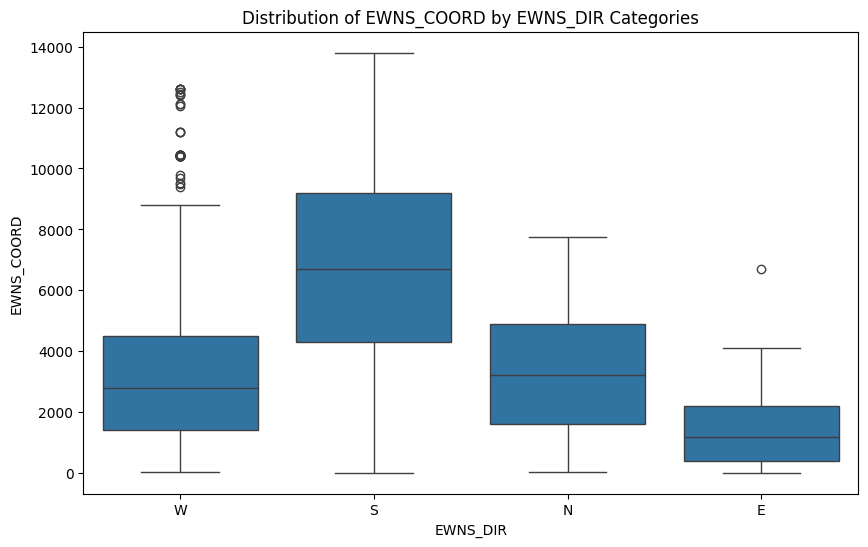

               EWNS_DIR_CODE  EWNS_COORD
EWNS_DIR_CODE       1.000000    0.372995
EWNS_COORD          0.372995    1.000000


In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EWNS_DIR', y='EWNS_COORD', data=street_boundary)
plt.title('Distribution of EWNS_COORD by EWNS_DIR Categories')
plt.show()

if 'EWNS_DIR' in street_boundary.columns and street_boundary['EWNS_DIR'].dtype in ['int64', 'float64']:
    print(street_boundary[['EWNS_DIR', 'EWNS_COORD']].corr())
else:
    
    street_boundary['EWNS_DIR_CODE'] = street_boundary['EWNS_DIR'].astype('category').cat.codes
    print(street_boundary[['EWNS_DIR_CODE', 'EWNS_COORD']].corr())


Given the insights from the relationship between EWNS_COORD and EWNS_DIR and the moderate correlation observed, you can use EWNS_COORD to impute missing values in EWNS_DIR. The strategy involves setting thresholds based on the distribution of EWNS_COORD within each directional category to categorize missing EWNS_DIR based on EWNS_COORD values. 

Fill missing EWNS_DIR values using refined thresholds based on EWNS_COORD.                                
  - Define a function with adjusted thresholds to impute EWNS_DIR.                          
  - Check the remaining missing values in EWNS_DIR and verify the changes.                              
- The `EWNS_DIR` column is filled more accurately based on new thresholds, improving the data completeness  and consistency.                                   

In [93]:
def refine_impute_ewns_dir(row):

    if pd.isna(row['EWNS_DIR']):
        if row['EWNS_COORD'] < 2500:
            return 'W'
        elif 2500 <= row['EWNS_COORD'] < 7000:
            return 'S'
        elif 7000 <= row['EWNS_COORD'] < 9000:
            return 'N'
        else:
            return 'E'
    else:
        return row['EWNS_DIR']


street_boundary['EWNS_DIR'] = street_boundary.apply(refine_impute_ewns_dir, axis=1)


In [94]:
print("Missing EWNS_DIR:", street_boundary['EWNS_DIR'].isnull().sum())

Missing EWNS_DIR: 0


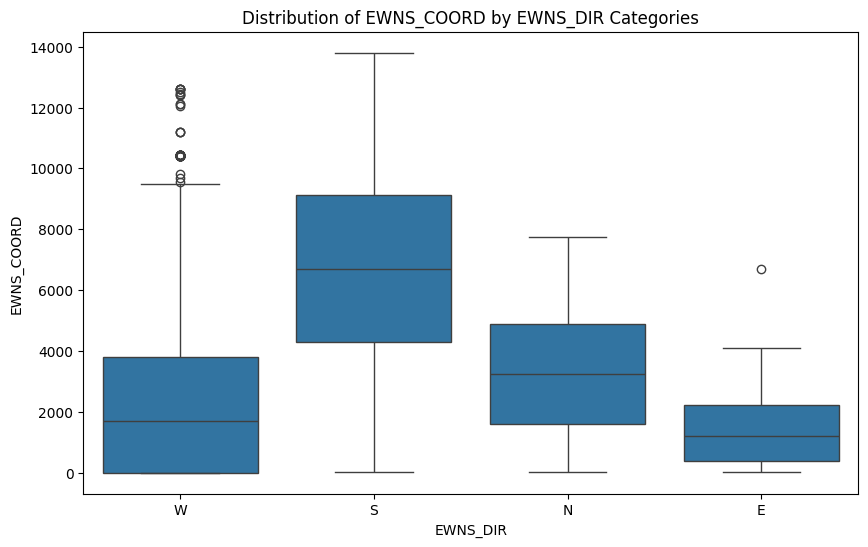

               EWNS_DIR_CODE  EWNS_COORD
EWNS_DIR_CODE       1.000000   -0.094314
EWNS_COORD         -0.094314    1.000000


In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EWNS_DIR', y='EWNS_COORD', data=street_boundary)
plt.title('Distribution of EWNS_COORD by EWNS_DIR Categories')
plt.show()

if 'EWNS_DIR' in street_boundary.columns and street_boundary['EWNS_DIR'].dtype in ['int64', 'float64']:
    print(street_boundary[['EWNS_DIR', 'EWNS_COORD']].corr())
else:
    street_boundary['EWNS_DIR_CODE'] = street_boundary['EWNS_DIR'].astype('category').cat.codes
    print(street_boundary[['EWNS_DIR_CODE', 'EWNS_COORD']].corr())


In [96]:
street_boundary.groupby('DIR_TRAVEL')['ONEWAY_DIR'].apply(lambda x: x.isnull().sum())

DIR_TRAVEL
B    36446
F        6
T        0
Name: ONEWAY_DIR, dtype: int64

Fill missing values in the ONEWAY_DIR column with a default value 'two way street'

In [97]:
street_boundary['ONEWAY_DIR'].fillna(value='two way street', inplace=True)
print("Missing ONEWAY_DIR:", street_boundary['ONEWAY_DIR'].isnull().sum())

Missing ONEWAY_DIR: 0


C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1664001661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  street_boundary['ONEWAY_DIR'].fillna(value='two way street', inplace=True)


In [98]:
print(f"Total rows before deletion: {street_boundary.shape[0]}")

Total rows before deletion: 55747


Removes rows from the street_boundary where the STREET_NAM column has missing values. 

In [99]:
street_boundary = street_boundary.dropna(subset=['STREET_NAM'])

In [100]:
print(f"Total rows after deletion: {street_boundary.shape[0]}")

Total rows after deletion: 55410


Fill missing values in the STREET_TYP column by distributing them proportionally based on the frequency of existing values, ensuring that the proportions of the different types remain consistent.

In [101]:
street_typ_counts = street_boundary['STREET_TYP'].value_counts()

street_typ_proportions = street_typ_counts / street_typ_counts.sum()
print(street_typ_proportions)

STREET_TYP
AVE     0.471446
ST      0.363799
PL      0.034400
EXPY    0.026916
DR      0.026806
RD      0.022012
BLVD    0.021683
ER      0.012351
XR      0.009222
PKWY    0.003623
CT      0.002928
TER     0.001336
RL      0.001025
HWY     0.000823
SR      0.000549
LN      0.000512
PLZ     0.000201
WAY     0.000128
SQ      0.000091
TOLL    0.000073
CRES    0.000037
ROW     0.000037
Name: count, dtype: float64


Step 1: Calculate the Number of Missing Values in STREET_TYP                                           
Step 2: Calculate the Proportional Distribution of Missing Values

In [102]:
num_missing = street_boundary['STREET_TYP'].isna().sum()

missing_distribution = (street_typ_proportions * num_missing).round().astype(int)

Step 3: Adjust for Rounding Errors                                                                                        

In [103]:
missing_distribution_adjusted = missing_distribution.copy()

difference = num_missing - missing_distribution_adjusted.sum()

for i in range(abs(difference)):
    index = i % len(missing_distribution_adjusted)
    if difference > 0:
        missing_distribution_adjusted.iloc[index] += 1
    else:
        missing_distribution_adjusted.iloc[index] -= 1

print(missing_distribution_adjusted)

STREET_TYP
AVE     359
ST      277
PL       26
EXPY     20
DR       20
RD       17
BLVD     16
ER        9
XR        7
PKWY      3
CT        2
TER       1
RL        1
HWY       1
SR        0
LN        0
PLZ       0
WAY       0
SQ        0
TOLL      0
CRES      0
ROW       0
Name: count, dtype: int32


Step 4: Generate the List of Missing Values                     
Step 5: Fill Missing Values in STREET_TYP                                                    
Step 6: Verify the Changes

In [104]:
missing_values = []

for street_typ, count in missing_distribution_adjusted.items():
    missing_values.extend([street_typ] * count)

np.random.shuffle(missing_values)

def fill_missing_street_typ(row):
    if pd.isna(row['STREET_TYP']):
        return missing_values.pop()
    return row['STREET_TYP']

street_boundary['STREET_TYP'] = street_boundary.apply(fill_missing_street_typ, axis=1)

remaining_missing_typ = street_boundary['STREET_TYP'].isna().sum()
print(f'Remaining missing STREET_TYP: {remaining_missing_typ}')

print(street_boundary.head())


Remaining missing STREET_TYP: 0
                                            the_geom  FNODE_ID  TNODE_ID  \
0  MULTILINESTRING ((-87.63187018232667 41.780809...     10809     16581   
1  MULTILINESTRING ((-87.60548932047061 41.762229...      6501     34082   
2  MULTILINESTRING ((-87.68381848191974 41.697243...     15338     22358   
3  MULTILINESTRING ((-87.645841892972 41.69339840...     15799     28881   
4  MULTILINESTRING ((-87.67053671318457 41.679759...     36407     36534   

   TRANS_ID PRE_DIR     STREET_NAM STREET_TYP  STREETNAME  L_F_ADD  L_T_ADD  \
0    127104       S           YALE        AVE        1782        0        0   
1    128895       S  COTTAGE GROVE        AVE        1236     7301     7359   
2    142645       S       CAMPBELL        AVE        1177    10801    10859   
3    148189       S       SANGAMON         ST        1696        0        0   
4    139728       W          118TH         ST        1823     1933     1959   

   ...      LENGTH  EDIT_DATE  EWNS_

In [105]:
print("Missing STREET_TYP:", street_boundary['STREET_TYP'].isnull().sum())

Missing STREET_TYP: 0


Fill missing values in the STATUS column with the mode of the column.

In [106]:
street_boundary['STATUS'].fillna(street_boundary['STATUS'].mode()[0], inplace=True)

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\4047248211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  street_boundary['STATUS'].fillna(street_boundary['STATUS'].mode()[0], inplace=True)


In [107]:
print(f'shape is {street_boundary.shape}')
print(street_boundary.isnull().sum().to_string())

shape is (55410, 47)
the_geom         0
FNODE_ID         0
TNODE_ID         0
TRANS_ID         0
PRE_DIR          0
STREET_NAM       0
STREET_TYP       0
STREETNAME       0
L_F_ADD          0
L_T_ADD          0
R_F_ADD          0
R_T_ADD          0
LOGICLF          0
LOGICLT          0
LOGICRF          0
LOGICRT          0
CLASS            0
STATUS           0
STATUS_DAT       0
TIERED           0
ONEWAY_DIR       0
DIR_TRAVEL       0
EWNS             0
L_PARITY         0
R_PARITY         0
F_ZLEV           0
T_ZLEV           0
L_FIPS           0
R_FIPS           0
R_ZIP            0
L_ZIP            0
R_CENSUSBL       0
L_CENSUSBL       0
F_CROSS          0
F_CROSS_ST       0
T_CROSS          0
T_CROSS_ST       0
LENGTH           0
EDIT_DATE        0
EWNS_DIR         0
EWNS_COORD       0
CREATE_USE       0
CREATE_TIM       0
UPDATE_USE       0
UPDATE_TIM       0
SHAPE_LEN        0
EWNS_DIR_CODE    0


### [2]

# [b] From Raw to Information

### [i]


In [108]:
def year(x):
    match=re.search(r'\b\d{4}\b',x)
    if match:
        return int(match.group())
    else:
        return None

crashes['CRASH_YEAR']=crashes['CRASH_DATE'].apply(year)

In [109]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,1.0,12,6,8,41.976201,-87.905309,POINT (-87.90530912499855 41.9762011389993),2023
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,1.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,1.0,0.0,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,...,0.0,0.0,1.0,8,3,11,41.849561,-87.663786,POINT (-87.6637858639531 41.84956132821276),2019
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,10,6,8,41.857208,-87.672517,POINT (-87.67251662409309 41.85720791479904),2023


### [ii]

To count passengers in each vehicle based on VEHICLE_ID:
1. take a subset of the crashes_people that PERSON_TYPE = "PASSENGER"
2. group the subset by VEHICLE_ID and take the size the store it in passenger_counts
3. calculate means  of passengers count and passengers_age

In [110]:
passengers = crashes_people[crashes_people["PERSON_TYPE"] == "PASSENGER"]
passenger_counts = passengers.groupby('VEHICLE_ID').size()
mean_passenger_count = passenger_counts.mean()
print("Mean Passenger Count per Vehicle:", mean_passenger_count)


mean_ages = passengers.groupby('VEHICLE_ID')['AGE'].mean().reset_index()
mean_ages.columns = ['VEHICLE_ID', 'MEAN_AGE']
passengers = passengers.merge(mean_ages, on='VEHICLE_ID')

print(passengers[['VEHICLE_ID', 'MEAN_AGE']].head())


Mean Passenger Count per Vehicle: 1.443034394085503
   VEHICLE_ID   MEAN_AGE
0    486598.0  18.000000
1     56541.0  26.166851
2   1549452.0  38.333701
3   1549455.0  51.000000
4    486601.0  38.333701


### [iii]

In [111]:
vehicles_per_crash = crashes_vehicles.groupby('CRASH_RECORD_ID')['VEHICLE_ID'].count()
vehicles_per_crash_df = vehicles_per_crash.reset_index(name='VEHICLES_COUNT')
crashes_vehicles=crashes_vehicles.merge(vehicles_per_crash_df,on="CRASH_RECORD_ID")
crashes_vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,is_duplicate,VEHICLES_COUNT
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NISSAN,SENTRA,IL,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT,True,1
1,34103,5be68a19c07b137b2da70d1c05503ac996a5f176aa582b...,03/14/2016 07:45:00 AM,1,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,-1,UNIDENTIFIED,UNIDENTIFIED,-1,-1,1.0,SIDE-LEFT,True,2
2,341048,06fb0163d2b955d782b2fccae2758cc8a5c21b67e7ba21...,03/11/2018 06:50:00 PM,1,DRIVER,329348.0,KENWORTH MOTOR TRUCK CO.,KENWORTH MOTOR TRUCK CO.,KS,2015.0,NONE,TRACTOR W/ SEMI-TRAILER,COMMERCIAL - MULTI-UNIT,N,TURNING LEFT,1.0,FRONT-RIGHT,True,1
3,341041,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,2,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,-1,UNIDENTIFIED,UNIDENTIFIED,-1,-1,0.0,TOTAL (ALL AREAS),True,3
4,341040,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,3,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,-1,UNIDENTIFIED,UNIDENTIFIED,-1,-1,0.0,REAR,True,3


### [iv]

Lets add a column that represent the CRASH_YEAR the calculate the difference between the crash_year and the vehicle_year when the vehicle_year != -1  
 
REMEMBER:vehicle_year==-1 means it's not a vehicle or unkown id

In [112]:
crashes_vehicles["CRASH_YEAR"]=pd.to_datetime(crashes_vehicles['CRASH_DATE'],format='%m/%d/%Y %I:%M:%S %p').dt.year
crashes_vehicles["YEAR_DIFF"]=pd.NA
crashes_vehicles.loc[crashes_vehicles['VEHICLE_YEAR'] != -1, 'YEAR_DIFF'] = crashes_vehicles['CRASH_YEAR'] - crashes_vehicles['VEHICLE_YEAR']
crashes_vehicles["YEAR_DIFF"].min()

-5.0

We noticed that there are some crashes dates in crashes_vehicles are before the vehicle_year 
to solve this issue we will set the vehicle_year in this situations to the year of crash


In [113]:
crashes_vehicles.loc[crashes_vehicles['YEAR_DIFF'] < 0, 'VEHICLE_YEAR'] = crashes_vehicles['CRASH_YEAR']
crashes_vehicles.loc[crashes_vehicles['VEHICLE_YEAR'] != -1, 'YEAR_DIFF'] = crashes_vehicles['CRASH_YEAR'] - crashes_vehicles['VEHICLE_YEAR']
print(crashes_vehicles["YEAR_DIFF"].min())
crashes_vehicles.head()



0.0


,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,...,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,is_duplicate,VEHICLES_COUNT,CRASH_YEAR,YEAR_DIFF
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NISSAN,SENTRA,IL,2009.0,...,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT,True,1,2023,14.0
1,34103,5be68a19c07b137b2da70d1c05503ac996a5f176aa582b...,03/14/2016 07:45:00 AM,1,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,UNIDENTIFIED,-1,-1,1.0,SIDE-LEFT,True,2,2016,<NA>
2,341048,06fb0163d2b955d782b2fccae2758cc8a5c21b67e7ba21...,03/11/2018 06:50:00 PM,1,DRIVER,329348.0,KENWORTH MOTOR TRUCK CO.,KENWORTH MOTOR TRUCK CO.,KS,2015.0,...,TRACTOR W/ SEMI-TRAILER,COMMERCIAL - MULTI-UNIT,N,TURNING LEFT,1.0,FRONT-RIGHT,True,1,2018,3.0
3,341041,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,2,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,UNIDENTIFIED,-1,-1,0.0,TOTAL (ALL AREAS),True,3,2018,<NA>
4,341040,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,3,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,UNIDENTIFIED,-1,-1,0.0,REAR,True,3,2018,<NA>


 Create a new column to categorize each record

In [114]:
def categorize_age(year_diff):
    if pd.isna(year_diff):
        return 'unknown'
    elif year_diff > 25:
        return 'ancient'
    elif 10 <= year_diff <= 25:
        return 'old'
    else:
        return 'new'

crashes_vehicles['CATEGORY'] = crashes_vehicles['YEAR_DIFF'].apply(categorize_age)
crashes_vehicles.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,...,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT,is_duplicate,VEHICLES_COUNT,CRASH_YEAR,YEAR_DIFF,CATEGORY
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,1634931.0,NISSAN,SENTRA,IL,2009.0,...,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT,True,1,2023,14.0,old
1,34103,5be68a19c07b137b2da70d1c05503ac996a5f176aa582b...,03/14/2016 07:45:00 AM,1,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,-1,-1,1.0,SIDE-LEFT,True,2,2016,<NA>,unknown
2,341048,06fb0163d2b955d782b2fccae2758cc8a5c21b67e7ba21...,03/11/2018 06:50:00 PM,1,DRIVER,329348.0,KENWORTH MOTOR TRUCK CO.,KENWORTH MOTOR TRUCK CO.,KS,2015.0,...,COMMERCIAL - MULTI-UNIT,N,TURNING LEFT,1.0,FRONT-RIGHT,True,1,2018,3.0,new
3,341041,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,2,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,-1,-1,0.0,TOTAL (ALL AREAS),True,3,2018,<NA>,unknown
4,341040,876daba3f6a88b9c1ee56a97e1fb0f2531e93104950a5b...,03/10/2018 04:00:00 AM,3,PARKED,-1.0,UNIDENTIFIED,UNIDENTIFIED,NOT REQUIRED,-1.0,...,UNIDENTIFIED,-1,-1,0.0,REAR,True,3,2018,<NA>,unknown


In [115]:
vehicle_classes_df = crashes_vehicles.groupby(['CRASH_RECORD_ID', 'CATEGORY']).size().reset_index(name='count')
vehicle_classes_df = vehicle_classes_df.pivot_table(index='CRASH_RECORD_ID', columns='CATEGORY', values='count', fill_value=0)
vehicle_classes_df.head()

CATEGORY,ancient,new,old,unknown
CRASH_RECORD_ID,,,,
000013b0123279411e0ec856dae95ab9f0851764350b7feaeb982c7707c6722066910e9391e60f45cec4b7a7a6643eeedb5de39e7245b03447a44c793680dc4b,0.0,1.0,0.0,1.0
00002c0771fb6f2c70ba775b7f6b501608cadea85c1dd1343228a53acd61a83b0e2b003ace79defc01b0f829fc47b9462027509b5e0ec1eaf3a5f2248121f379,0.0,2.0,0.0,0.0
000043c6564ec4d54bc4efd957d97ca97f38a965dd64b46b4ea46338c63fa875f71181d3e7056d22be66221a51ec6eca0b050ed5be812e331733616faae49fea,0.0,0.0,1.0,0.0
00005696946846c8b8a1d378dba4e2a5ed84a9b2876fe00a2d4ebe3f917e0e8420cdd1c957d5ccc803ccc88fcb29b6bcbe2525686220818d6fe7f79e7b2b378e,0.0,0.0,0.0,1.0
000070ed7a6357c3298f5edc6fb7d5ce925a10f46660f37f6c9b02e2a430d38ec739d2a5f45432979a01920c84f4700f6d4d63103a7878169bc1946367e8ee0a,0.0,0.0,2.0,0.0


In [116]:
vehicle_classes_df["VEHICLE_CLASSES"] = ''
vehicle_classes_df["VEHICLE_CLASSES"] = np.where(vehicle_classes_df['new'] > 0, 'new', vehicle_classes_df['VEHICLE_CLASSES'])
vehicle_classes_df["VEHICLE_CLASSES"] = np.where(vehicle_classes_df['ancient'] > 0, vehicle_classes_df["VEHICLE_CLASSES"] + ',ancient', vehicle_classes_df['VEHICLE_CLASSES'])
vehicle_classes_df["VEHICLE_CLASSES"] = np.where(vehicle_classes_df['old'] > 0, vehicle_classes_df["VEHICLE_CLASSES"] + ',old', vehicle_classes_df['VEHICLE_CLASSES'])
vehicle_classes_df["VEHICLE_CLASSES"] = np.where(vehicle_classes_df['unknown'] > 0, vehicle_classes_df["VEHICLE_CLASSES"] + ',unknown', vehicle_classes_df['VEHICLE_CLASSES'])
vehicle_classes_df["VEHICLE_CLASSES"] = vehicle_classes_df["VEHICLE_CLASSES"].str.strip(',')
crashes['VEHICLE_CLASSES'] = crashes['CRASH_RECORD_ID'].map(vehicle_classes_df['VEHICLE_CLASSES'])
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,VEHICLE_CLASSES
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,0.0,1.0,12,6,8,41.976201,-87.905309,POINT (-87.90530912499855 41.9762011389993),2023,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,1.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023,unknown
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023,old
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,...,0.0,1.0,8,3,11,41.849561,-87.663786,POINT (-87.6637858639531 41.84956132821276),2019,unknown
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,0.0,1.0,10,6,8,41.857208,-87.672517,POINT (-87.67251662409309 41.85720791479904),2023,NaN


we can see that there are many nan values in VEHICLE_CLASSES and that because of when we cleaned the data there are many crash_records has no information just the date so we have droped those records 
to solve nan values of VEHICLE_CLASSES we will fill them with "NO_INFO_ABOUT_VEHICLES" 

In [117]:
crashes['VEHICLE_CLASSES'] = crashes['CRASH_RECORD_ID'].map(vehicle_classes_df['VEHICLE_CLASSES']).fillna("NO_INFOS_ABOUT_VEHICLES")
print(crashes["VEHICLE_CLASSES"].isnull().sum())
crashes.head()

0


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,VEHICLE_CLASSES
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,0.0,1.0,12,6,8,41.976201,-87.905309,POINT (-87.90530912499855 41.9762011389993),2023,NO_INFOS_ABOUT_VEHICLES
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,1.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023,unknown
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023,old
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,...,0.0,1.0,8,3,11,41.849561,-87.663786,POINT (-87.6637858639531 41.84956132821276),2019,unknown
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,0.0,1.0,10,6,8,41.857208,-87.672517,POINT (-87.67251662409309 41.85720791479904),2023,NO_INFOS_ABOUT_VEHICLES


To understand the values of vehicles_classes vslues:
old,ancient and new are clear to understand.  
unknown values means thera are no infos about the vehicle_year or the unit isn't a vehicle.  
NO_INFOS_ABOUT_VEHICLES means there are no vehicles in this crash record based on the data cleaning operations

### [v]

In [118]:
bin_conditions = [
    (crashes['VEHICLE_CLASSES'] == 'new') & (crashes['VEHICLE_CLASSES'] != 'unknown') & (crashes['VEHICLE_CLASSES'] != 'NO_INFOS_ABOUT_VEHICLES'),
    (crashes['VEHICLE_CLASSES'] == 'old') & (crashes['VEHICLE_CLASSES'] != 'unknown') & (crashes['VEHICLE_CLASSES'] != 'NO_INFOS_ABOUT_VEHICLES'),
    (~crashes['VEHICLE_CLASSES'].isin(['unknown', 'new', 'old', 'NO_INFOS_ABOUT_VEHICLES']))
]
crashes["VEHICLE_CLASSES_BINNED"] = np.where(bin_conditions[0], 'new', crashes['VEHICLE_CLASSES'])
crashes["VEHICLE_CLASSES_BINNED"] = np.where(bin_conditions[1], 'old', crashes['VEHICLE_CLASSES'])
crashes["VEHICLE_CLASSES_BINNED"] = np.where(bin_conditions[2], 'mixed', crashes['VEHICLE_CLASSES'])
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,CRASH_YEAR,VEHICLE_CLASSES,VEHICLE_CLASSES_BINNED
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,12,6,8,41.976201,-87.905309,POINT (-87.90530912499855 41.9762011389993),2023,NO_INFOS_ABOUT_VEHICLES,NO_INFOS_ABOUT_VEHICLES
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,1.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952),2023,unknown,unknown
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,1.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023,old,old
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,...,1.0,8,3,11,41.849561,-87.663786,POINT (-87.6637858639531 41.84956132821276),2019,unknown,unknown
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,1.0,10,6,8,41.857208,-87.672517,POINT (-87.67251662409309 41.85720791479904),2023,NO_INFOS_ABOUT_VEHICLES,NO_INFOS_ABOUT_VEHICLES


To understand the values of vehicles_classes_binned vslues:  

class => bin of the class  
old => old  
new => new  
unknown => unknown  
NO_INFOS_ABOUT_VEHICLE => NO_INFOS_ABOUT_VEHICLE  
other cases => mixed  

### [vi]

we used geohash library to encode the location of crashes and set precision to 6 so it will represent an area 1.22 km x 0.61 km wich we find is good in our case

In [119]:
def geohash_coordinates(lat, lon, precision):
    return geohash.encode(lat, lon, precision)
crashes['Geohash'] = crashes.apply(lambda row: geohash_coordinates(row['LATITUDE'], row['LONGITUDE'], precision=6), axis=1)

### [vii]

we calculat the count of accident in each area and categorize them to : Red for areas with more than 80% of the accident count, Grey for areas with less than 30% of the accident count and Yellow for the rest areas

In [120]:
crashes['AccidentCount'] = crashes['Geohash'].map(crashes['Geohash'].value_counts())

percentile_80 = np.percentile(crashes['AccidentCount'], 80)
percentile_30 = np.percentile(crashes['AccidentCount'], 30)

print(f"80th Percentile: {percentile_80}")
print(f"30th Percentile: {percentile_30}")

def categorize(count, percentile_30, percentile_80):
    if count >= percentile_80:
        return 'Red'
    elif count <= percentile_30:
        return 'Grey'
    else:
        return 'Yellow'

crashes['AccidentCount_Category'] = crashes['AccidentCount'].apply(lambda x: categorize(x, percentile_30, percentile_80))

80th Percentile: 1731.0
30th Percentile: 813.0


### [viii]

first we remove streets with type {CT ,ER ,EXPY, TOLL, WAY} because they are considered auxiliary or non-main street types 

In [121]:
street = street_boundary[['STREET_NAM','STREET_TYP','LENGTH']]
ignore_types = ['CT', 'ER', 'EXPY', 'TOLL', 'WAY']
street = street[~street['STREET_TYP'].isin(ignore_types)]

we sum length of all streets with same name and stored them in new df "street" and make it in KM , then we categorize them to: Short for streets with length equal or less than 33% of all streets , Medium for street with length between 33 and 66 persent and Long for the rest

In [122]:
street_length = street.groupby('STREET_NAM')['LENGTH'].sum().reset_index()

street = street.merge(street_length, on='STREET_NAM', suffixes=('', '_sum'))
street.rename(columns={'LENGTH_sum': 'street_length'}, inplace=True)
street['LENGTH_KM']=street['street_length']* 0.0003048

percentile_33 = np.percentile(street['LENGTH_KM'], 33)
percentile_66 = np.percentile(street['LENGTH_KM'], 66)

print(f"33rd Percentile: {percentile_33}")
print(f"66th Percentile: {percentile_66}")

def categorize_length(length):
    if length <= percentile_33:
        return 'Short'
    elif length <= percentile_66:
        return 'Medium'
    else:
        return 'Long'

street['Length_Category'] = street['LENGTH_KM'].apply(categorize_length)

33rd Percentile: 9.170188575072071
66th Percentile: 15.855394583837784


first we make a copy of STREET_NAME and store it in result then we added STREET_NAM and STREET_TYP from street_boundary and store them in new df to merge them with STREET_NAME in result, we dropped the duplicate stree name becaues they will affect the merge proccess 

In [123]:
result = crashes[['STREET_NAME']].copy()
street['STREET_NAME'] = street['STREET_NAM'] + " " + street['STREET_TYP']
cheack_full_name = street[['STREET_NAME','Length_Category']].copy()
cheack_full_name.drop_duplicates(subset=['STREET_NAME','Length_Category'],inplace=True)

result = result.merge(cheack_full_name, on='STREET_NAME',how='left')
result['Length_Category'].isnull().sum()

30033

we still have missing values in Length_Category, we'll try to merge using only STREET_NAM from street_boundary to fill the left missing values

In [124]:
check_name_without_type = street[['STREET_NAM','Length_Category']].copy()
check_name_without_type.drop_duplicates(subset=['STREET_NAM', 'Length_Category'], inplace=True)

length_category_dict = dict(zip(check_name_without_type['STREET_NAM'], check_name_without_type['Length_Category']))

def get_length_category(text, lookup_dict):
    for key in lookup_dict:
        if key in text:
            return lookup_dict[key]
    return None

result['Length_Category'] = result.apply(
    lambda row: get_length_category(row['STREET_NAME'], length_category_dict) if pd.isnull(row['Length_Category']) else row['Length_Category'],
    axis=1
)
result['Length_Category'].isnull().sum()

3079

we'll fill the rest with the most frequent value in Length_Category 

In [125]:
result['Length_Category'] = result['Length_Category'].fillna(value = result['Length_Category'].mode()[0])
result = result.set_index(crashes.index)
crashes['Length_Category'] = result['Length_Category']

### [ix]

first we'll use shapely library to parse the MULTIPOLYGON string and create a Polygon object

In [126]:
multipolygon_str = CBD_boundary.loc[0, 'the_geom']
multipolygon_str_clean = multipolygon_str.replace('MULTIPOLYGON (((', '').replace(')))', '')
multipolygon_str_clean = re.sub(r'\s+', ' ', multipolygon_str_clean) 

coordinates = multipolygon_str_clean.split(', ')
coordinates = [[list(map(float, coord.split())) for coord in coordinates]]

geojson_str = json.dumps({"type": "MultiPolygon", "coordinates": [coordinates]})
cbd_multipolygon = shape(json.loads(geojson_str))

then we'll calculate the distance of each accident form the nearest point on the CBD polygon

In [127]:
def calculate_distance_from_cbd(lat, lon, cbd_multipolygon):
    accident_point = Point(lon, lat)
    min_distance = float('inf')

    for polygon in cbd_multipolygon.geoms:
        nearest_point_on_polygon = polygon.exterior.interpolate(polygon.exterior.project(accident_point))
        accident_coords = (lat, lon)
        polygon_coords = (nearest_point_on_polygon.y, nearest_point_on_polygon.x)
        distance = geodesic(accident_coords, polygon_coords).kilometers
        min_distance = min(min_distance, distance)

    return min_distance

crashes['DistanceFromCBD'] = crashes.apply(lambda row: calculate_distance_from_cbd(row['LATITUDE'], row['LONGITUDE'], cbd_multipolygon), axis=1)

we categorize the distance form CBD using percentiles to : Near for the accidents with distances <= 33rd percentile, Medium for accidents with distances between the 33rd and 66th percentiles, Far for ccidents with distances > 66th percentile.

In [128]:

percentile_33 = np.percentile(crashes['DistanceFromCBD'], 33)
percentile_66 = np.percentile(crashes['DistanceFromCBD'], 66)

print(f"33rd Percentile: {percentile_33}")
print(f"66th Percentile: {percentile_66}")

def categorize_distance(distance):
    if distance <= percentile_33:
        return 'Near'
    elif distance <= percentile_66:
        return 'Medium'
    else:
        return 'Far'

crashes['DistanceFromCBD_Category'] = crashes['DistanceFromCBD'].apply(categorize_distance)
crashes[['DistanceFromCBD', 'DistanceFromCBD_Category']].head()

33rd Percentile: 6.086206660060561
66th Percentile: 10.87267543650376


,DistanceFromCBD,DistanceFromCBD_Category
0,23.113258,Far
1,2.126818,Near
2,10.775932,Medium
3,2.390898,Near
4,2.381793,Near


### [x]

we binarize the crashes based on the distance from the CBD to : 'inside' accidents with distances ≤ 6.0 k form the CBD and 'outside' for the rest

In [129]:
crashes['WithinCBD']=crashes['DistanceFromCBD'].apply(lambda x: 'inside' if x<=6 else 'outside')
crashes[['DistanceFromCBD', 'WithinCBD']].head(10)

,DistanceFromCBD,WithinCBD
0,23.113258,outside
1,2.126818,inside
2,10.775932,outside
3,2.390898,inside
4,2.381793,inside
5,0.045168,inside
6,2.380841,inside
7,17.959658,outside
8,9.790754,outside
9,7.448181,outside


### [xi]

first we clean and convert the MULTIPOLYGON strings to shapely objects and then we create GeoDataFrames for police_beat_boundart and crashes 

In [130]:
def multipolygon_to_shape(multipolygon_str):
    multipolygon_str_clean = multipolygon_str.replace('MULTIPOLYGON (((', '').replace(')))', '')
    multipolygon_str_clean = re.sub(r'\)\s*,\s*\(', '), (', multipolygon_str_clean) 
    multipolygon_str_clean = re.sub(r'\s+', ' ', multipolygon_str_clean)  
    
    coordinates = []
    for part in multipolygon_str_clean.split('), ('):
        part = part.replace('(', '').replace(')', '')
        coords = [list(map(float, coord.split())) for coord in part.split(', ')]
        coordinates.append([coords])

    geojson_str = json.dumps({"type": "MultiPolygon", "coordinates": coordinates})
        
    return shape(json.loads(geojson_str))

police_beat_boundary['geometry'] = police_beat_boundary['the_geom'].apply(multipolygon_to_shape)

police_beat_boundary_gdf = gpd.GeoDataFrame(police_beat_boundary, geometry='geometry')
crashes_gdf = gpd.GeoDataFrame(crashes, geometry=gpd.points_from_xy(crashes.LONGITUDE, crashes.LATITUDE))


then we perform the spatial join to determine the district for each crash

In [131]:
crashes_with_districts = gpd.sjoin(crashes_gdf, police_beat_boundary_gdf, how="left", op="within")

crashes['DISTRICT'] = crashes_with_districts['DISTRICT']
crashes['DISTRICT'].head()

C:\Users\VIOLET\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


0    16.0
1    12.0
2    16.0
3    12.0
4    12.0
Name: DISTRICT, dtype: float64

### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1414952996.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


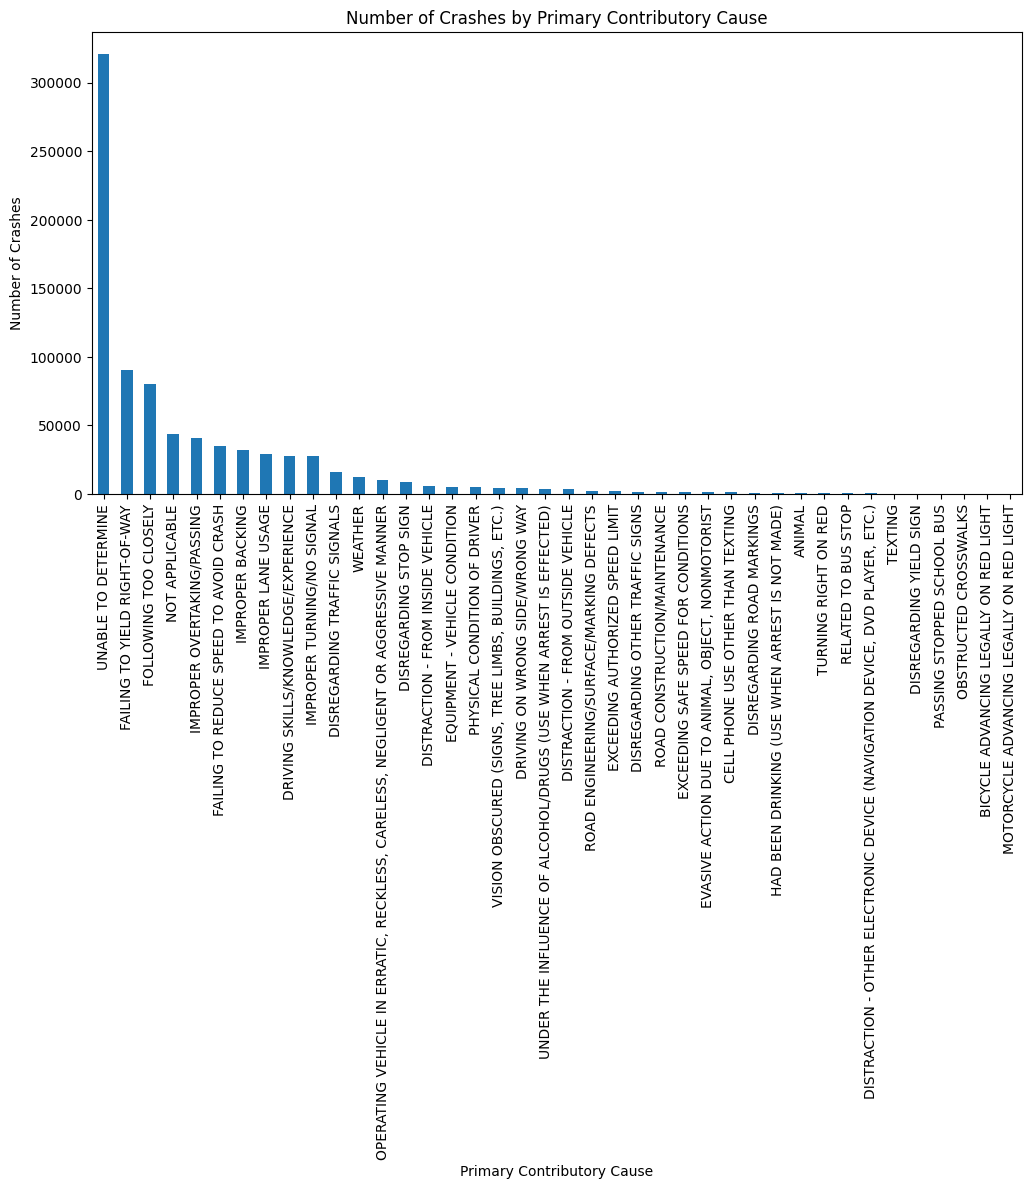

In [132]:
crashes_by_cause = crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

plt.figure(figsize=(12, 6))
crashes_by_cause.plot(kind='bar')
plt.title('Number of Crashes by Primary Contributory Cause')
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From observation, we find that the “unable to determine” category: contains the largest number of accidents, meaning that the police were unable to determine the cause of the accident 😕             
There are also the most common reasons:
Do not reduce speed to avoid an accident.
Follow closely.
Failure to give priority.
Which indicates common driving behaviors that lead to accidents.              

### [ii]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\3615516181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts = crashes.groupby(['LIGHTING_CONDITION', 'DAMAGE']).size().unstack()


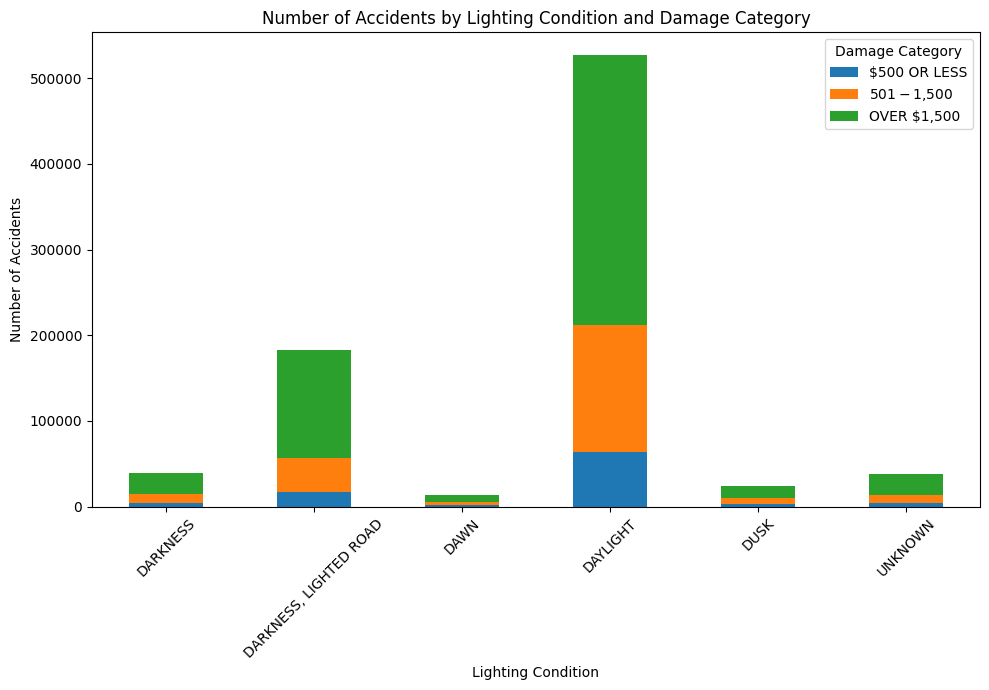

In [133]:
accident_counts = crashes.groupby(['LIGHTING_CONDITION', 'DAMAGE']).size().unstack()

accident_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of Accidents by Lighting Condition and Damage Category')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Damage Category')
plt.tight_layout()
plt.show()

It is planned that the highest number of traffic accidents occur in daylight (daylight), and the majority of accidents occur in the “over $1,500” damage category, i.e. the most serious accidents during the day.
The second highest number of accidents occur in the dark with lighting on the road (DARKNESS, LIGHTED ROAD), and most accidents also occur in the “OVER $1,500” category.
We find that darkness without lighting (DARKNESS) causes fewer accidents than during the day, with relative equality between the different damage categories.
Dawn and Sunset (DAWN and DUSK): Lowest number of incidents, with a balance between different damage classes.

### [iii]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\3844444642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts = crashes.groupby(['CRASH_TYPE', 'FIRST_CRASH_TYPE']).size().unstack()


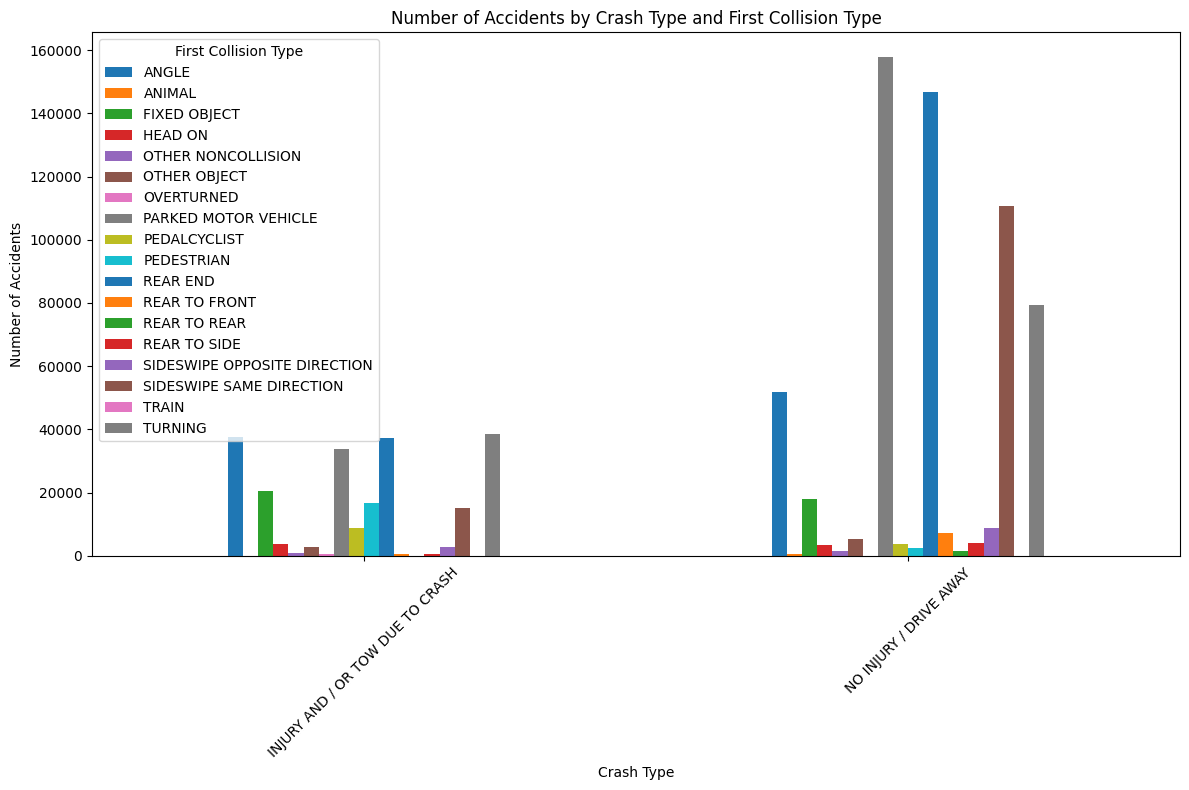

In [134]:
accident_counts = crashes.groupby(['CRASH_TYPE', 'FIRST_CRASH_TYPE']).size().unstack()

accident_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Accidents by Crash Type and First Collision Type')
plt.xlabel('Crash Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='First Collision Type')
plt.tight_layout()
plt.show()

From the graph we find that corner collisions cause the majority of accidents with or without injuries appearing prominently in both categories                                       
We also note that fixed objects (FIXED OBJECT) and collisions from behind (REAR END)
It appears most often in the category involving injuries and indicates that these types of collisions may be more serious.                                                      
Collisions with pedestrians (PEDESTRIAN) and cyclists (PEDALCYCLIST)
Although their number is small compared to other types of collisions, they constitute a large percentage of accidents that lead to injuries.                            
Rear-to-front collisions and rollover collisions also contribute less to the number of accidents, but they may be indicators of a certain severity of the accident.                                       

### [iv]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1784171346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts = crashes.groupby(['TRAFFICWAY_TYPE', 'LIGHTING_CONDITION']).size().unstack()


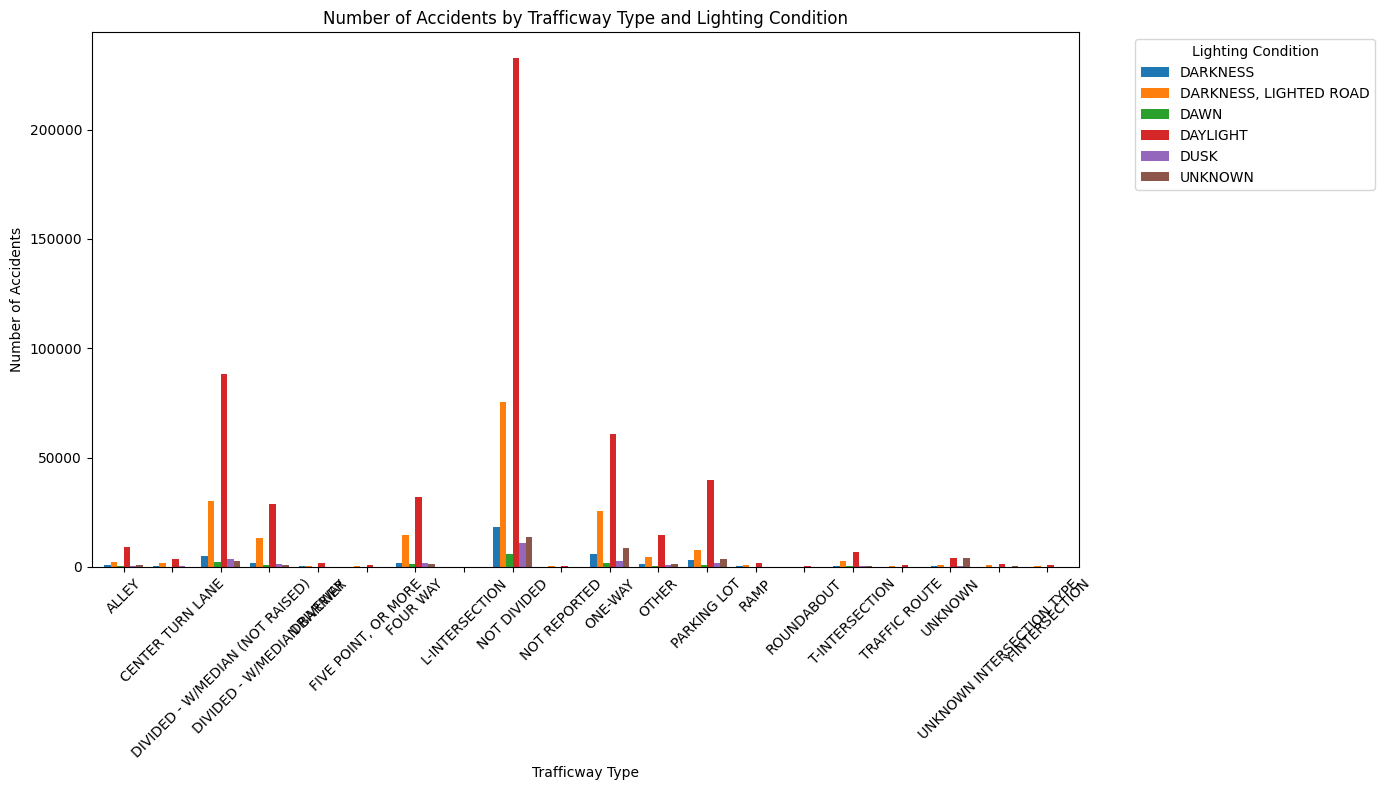

In [135]:
accident_counts = crashes.groupby(['TRAFFICWAY_TYPE', 'LIGHTING_CONDITION']).size().unstack()

accident_counts.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Number of Accidents by Trafficway Type and Lighting Condition')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Lighting Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We find that the road not divided (NOT DIVIDED) and the road not marked (NOT REPORTED) are the most vulnerable to traffic accidents, especially in daylight conditions.
Other roads, such as roads with intersections (INTERSECTION) and roads separated by a median (DIVIDED - W/MEDIAN (NOT RAISED)), also show a high rate of accidents, but they are lower compared to non-separated roads.
Daylight conditions are the period when most accidents occur, followed by darkness on lighted roads (DARKNESS, LIGHTED ROAD) and darkness.

## [b] Traffic Accidents History


### [i]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\392068681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_counts = crashes.groupby(['CRASH_HOUR', 'DAMAGE']).size().unstack()


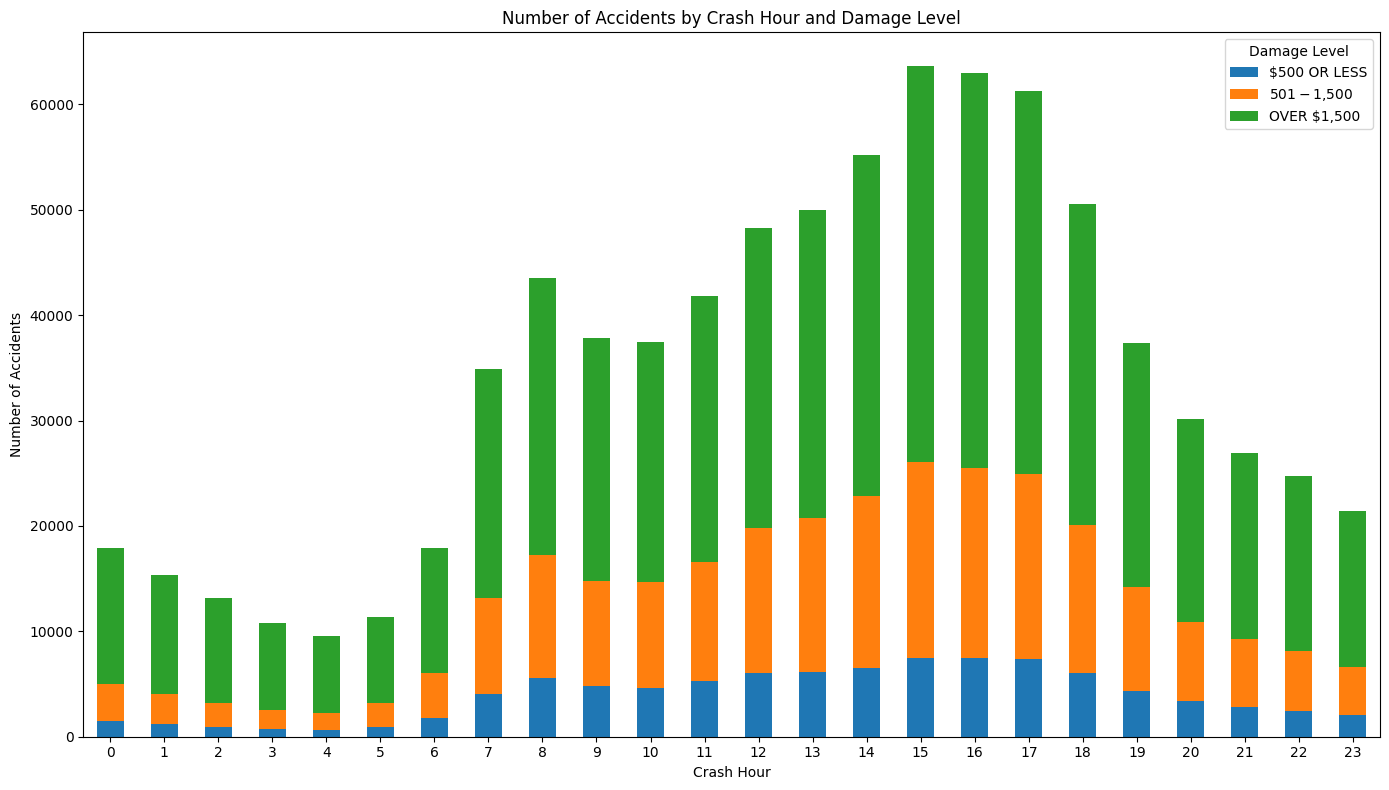

In [136]:
accident_counts = crashes.groupby(['CRASH_HOUR', 'DAMAGE']).size().unstack()

accident_counts.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Number of Accidents by Crash Hour and Damage Level')
plt.xlabel('Crash Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Damage Level')
plt.tight_layout()
plt.show()

Accidents increase significantly during the day, especially between seven in the morning and seven in the evening.                                                                                         
The peak incidents occur between 2pm and 6pm.                                               

### [ii]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\2016559617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = crashes.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size()


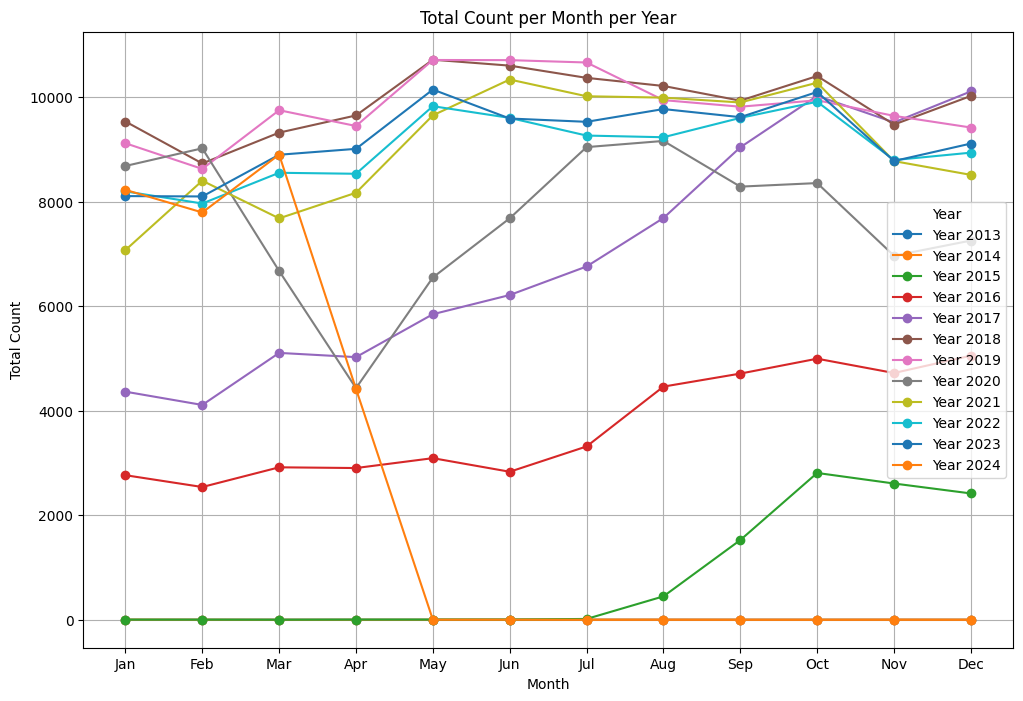

In [137]:
monthly_counts = crashes.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size()

monthly_counts = monthly_counts.reset_index(name='total_count')

pivot_table = monthly_counts.pivot(index='CRASH_MONTH', columns='CRASH_YEAR', values='total_count')

plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='o', linestyle='-', label=f'Year {column}')
plt.title('Total Count per Month per Year')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

It is clear from the chart that there is a general pattern where the number of accidents increases in the summer months (June, July, and August) and decreases in the winter months (January, February, and December). This could be related to increased traffic during the summer months due to holidays and summer activities. Some differences can be observed between different years, and some years also show relative stability in the number of accidents over the months, which may indicate the presence of stable traffic conditions during that period.

### [iii]

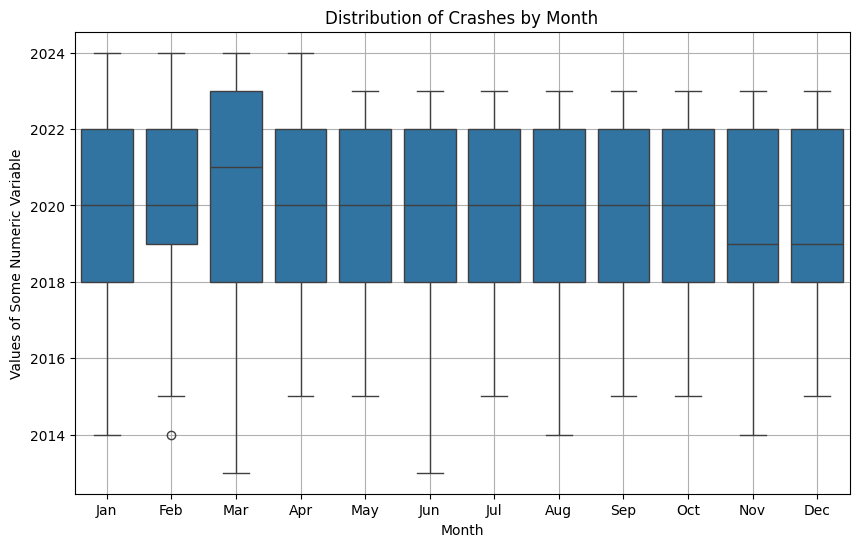

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CRASH_MONTH', y='CRASH_YEAR', data=crashes)
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Values of Some Numeric Variable')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

We note that the distribution of the number of incidents is roughly equal across the different months with some exceptions in March and April.                                                           
The presence of some outliers indicates the presence of unusual incidents in these months, which may require studying possible causes such as weather conditions or special events.

### [iv]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\2373306481.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = crashes.groupby(['CRASH_DAY_OF_WEEK', 'DAMAGE']).size().reset_index(name='count')
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\2373306481.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inner_grouped = grouped_data.groupby('CRASH_DAY_OF_WEEK')['count'].sum().reset_index()


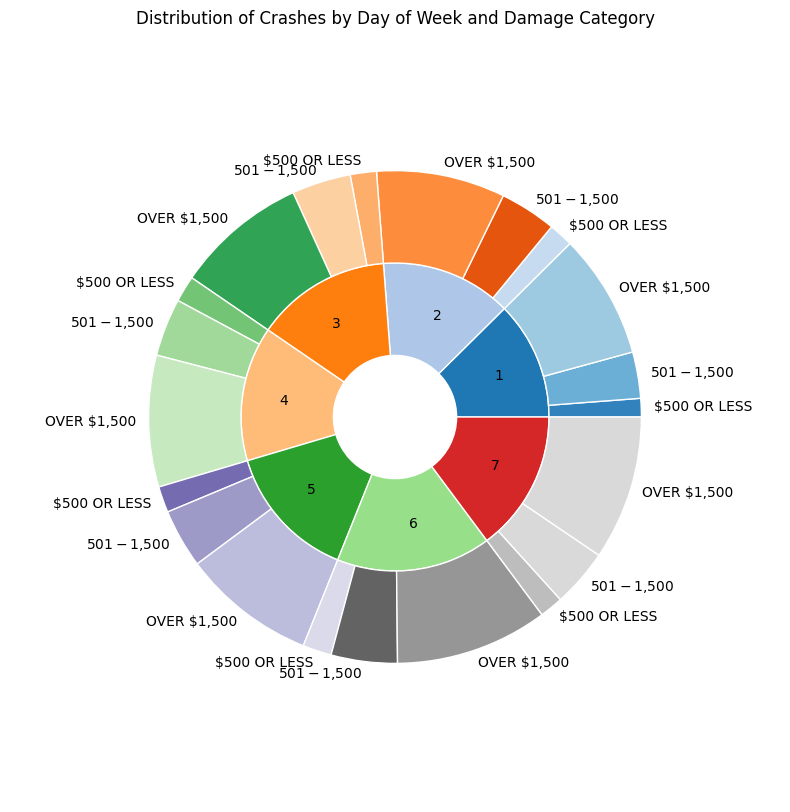

In [139]:
grouped_data = crashes.groupby(['CRASH_DAY_OF_WEEK', 'DAMAGE']).size().reset_index(name='count')
inner_grouped = grouped_data.groupby('CRASH_DAY_OF_WEEK')['count'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

inner_colors = plt.cm.tab20(range(len(inner_grouped)))
outer_colors = plt.cm.tab20c(range(len(grouped_data)))

wedges, texts = ax.pie(inner_grouped['count'], radius=0.5, colors=inner_colors,labeldistance=0.7, labels=inner_grouped['CRASH_DAY_OF_WEEK'], wedgeprops=dict(width=0.3, edgecolor='w'))

outer_sizes = grouped_data['count']
outer_labels = grouped_data['DAMAGE']
ax.pie(outer_sizes, radius=0.8, colors=outer_colors, labels=outer_labels, labeldistance=1.05, wedgeprops=dict(width=0.3, edgecolor='w'))

plt.title('Distribution of Crashes by Day of Week and Damage Category')
plt.show()

The inset chart shows the distribution of incidents on days of the week. We note that accidents are distributed almost equally on all days of the week, with a greater concentration on some days.          
The outline shows the distribution of incidents according to damage categories assessed by the police officer.                                                                                  
It can be seen that the incidents are distributed throughout the week, with a noticeable concentration at the beginning and end of the week.
Accidents with significant damage (above $1,500) are most common, which may indicate the severity of the accident or the high cost of repairs.   

## [c] Spatial Analysis


### [i]

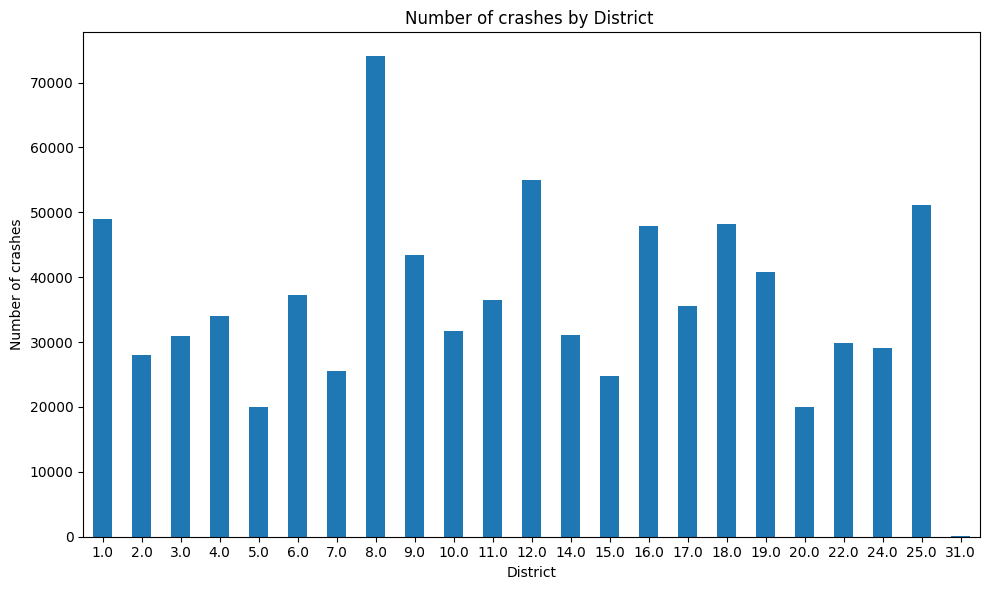

In [140]:
crashes_counts = crashes.groupby('DISTRICT').size()

plt.figure(figsize=(10, 6))
crashes_counts.plot(kind='bar')
plt.title('Number of crashes by District ')
plt.xlabel('District')
plt.ylabel('Number of crashes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### [ii]

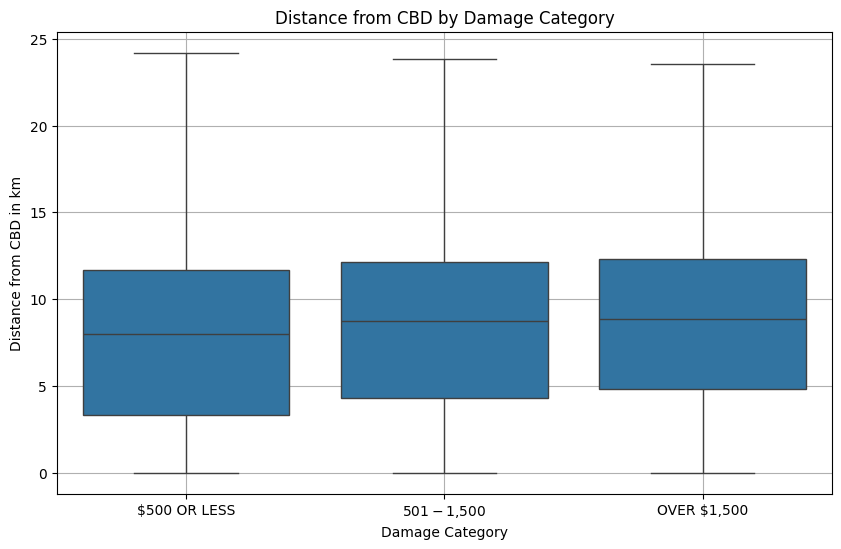

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAMAGE', y='DistanceFromCBD', data=crashes , showfliers=False)
plt.xlabel('Damage Category')
plt.ylabel('Distance from CBD in km')
plt.title('Distance from CBD by Damage Category')
plt.grid(True)
plt.show()

there is no significant difference in the distances from the CBD across the damage categories. therefore there isn't a strong relation between the disntance from CBD and the Damage in the crashe scene

### [iii]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\1662056220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='LENGTH_KM', data=street, palette="Set3", showfliers=False)


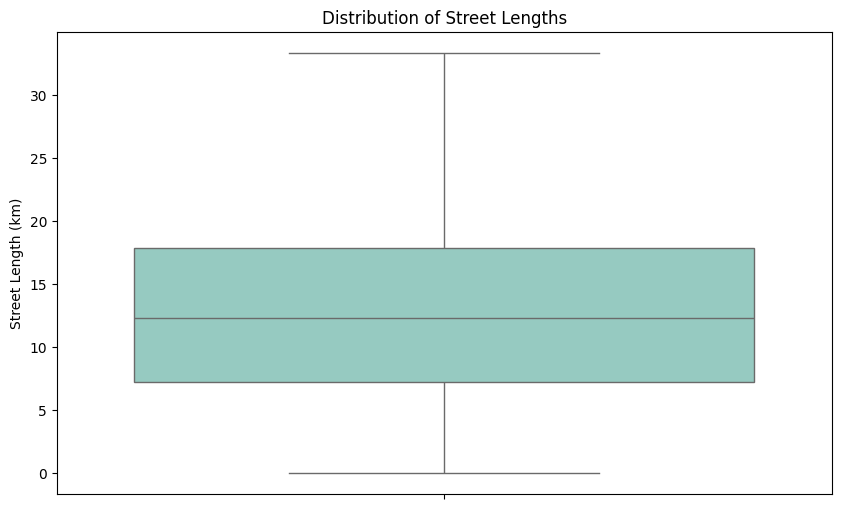

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='LENGTH_KM', data=street, palette="Set3", showfliers=False)
plt.ylabel('Street Length (km)')
plt.title('Distribution of Street Lengths')
plt.show()

 the majority of street lengths range from 10 km to 20 km

### [iv]

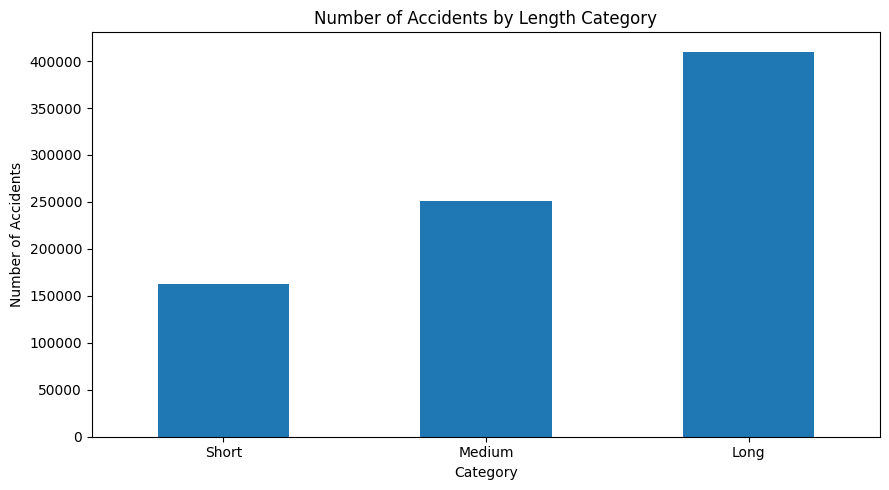

In [143]:
label=['Short','Medium','Long']
accident_counts = crashes.groupby('Length_Category').size().reindex(label)

plt.figure(figsize=(9, 5))
accident_counts.plot(kind='bar')
plt.title('Number of Accidents by Length Category')
plt.xlabel('Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


there is a correlation between street length and number of crashes , we see that Long streets have the most crashes number and Short streets have the least crashes number. in Long streets the street limit is higher and usually drivers go over the speed limits and that could cases to more accident , while in Short streets drivers usally drive slower and they can avoid accidents.


### [v]

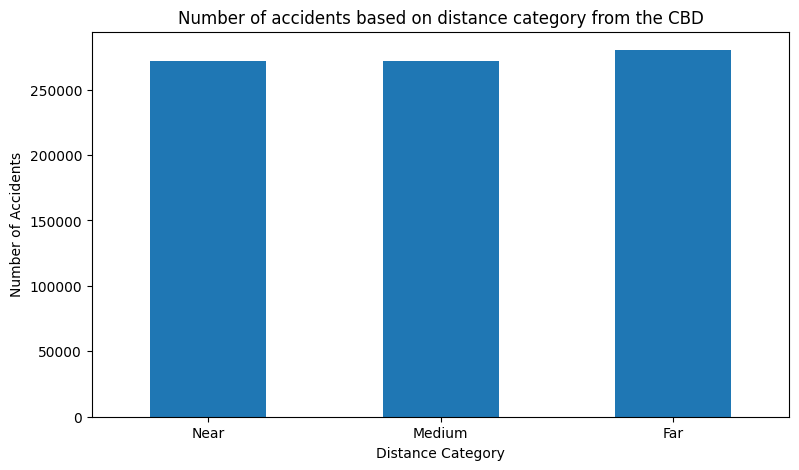

In [144]:
label=['Near','Medium','Far']
accident_counts = crashes['DistanceFromCBD_Category'].value_counts().reindex(label)

plt.figure(figsize=(9, 5))
accident_counts.plot(kind='bar')
plt.xlabel('Distance Category')
plt.ylabel('Number of Accidents')
plt.title('Number of accidents based on distance category from the CBD')
plt.xticks(rotation=0)
plt.show()


we note that the distribution of accidents is almost equal based on distance category from the CBD , we see that there isn't correlation between them and the distance from the CBD does not significantly impact the number of accidents  

### [vi]

In [145]:
contingency_table = pd.crosstab(crashes['DistanceFromCBD_Category'], crashes['Length_Category'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))

print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

print("\nCramér's V:")
print(cramers_v)

alpha = 0.05
if p <= alpha:
    print("\nThere is a statistically significant association between DistanceFromCBD_Category and Length_Category (reject H0).")
else:
    print("\nThere is no statistically significant association between DistanceFromCBD_Category and Length_Category (fail to reject H0).")

Contingency Table:
Length_Category             Long  Medium  Short
DistanceFromCBD_Category                       
Far                       135780   80452  63908
Medium                    146273   88184  37447
Near                      128056   82605  61242

Chi-Square Test Results:
Chi2 Statistic: 9312.151447577031
P-Value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[139436.07448052  85421.336251    55282.58926848]
 [135336.7116283   82909.98433637  53657.30403533]
 [135336.21389118  82909.67941263  53657.10669618]]

Cramér's V:
0.07517273977581197

There is a statistically significant association between DistanceFromCBD_Category and Length_Category (reject H0).


the p-value is 0.0, which is less than the alpha level of 0.05, indicating that there is a statistically significant association between DistanceFromCBD_Category and Length_Category.                                                                                                               
Cramér's V value is almost 0.074, which means that the association between the two variables is weak. while the association is statistically significant, it is not strong.                                                                                                                                           
The expected frequencies are close to the observed frequencies, which is typically the case in large sample sizes. The difference between observed and expected frequencies contributes to the Chi-Square statistic.                                                                                               
overall the analysis indicates that there is a significant but weak association between the distance from the CBD and the length category of the streets

## [d] Passengers Cases Analysis


### [i]

C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\422922660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_df['YEAR_DIFF']=drivers_df['YEAR_DIFF'].fillna(-1)
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\422922660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_df['SEX_NUM'] = drivers_df['SEX'].map(sex_mapping)


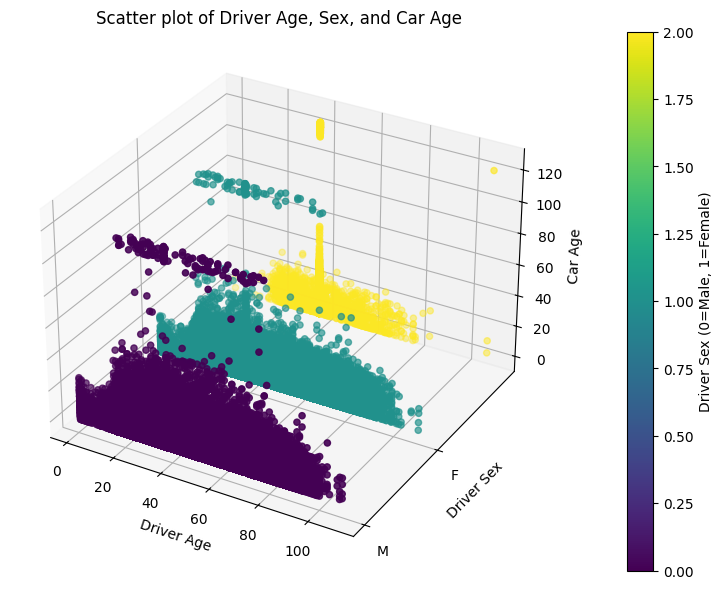

In [146]:
merged_df = pd.merge(crashes_vehicles[["CRASH_RECORD_ID","YEAR_DIFF","UNIT_TYPE"]], crashes_people[["AGE","SEX","PERSON_TYPE","CRASH_RECORD_ID"]], on='CRASH_RECORD_ID')

drivers_df = merged_df[(merged_df['PERSON_TYPE'] == 'DRIVER' )&(merged_df['UNIT_TYPE'] == 'DRIVER')]

sex_mapping = {'M': 0, 'F': 1 , 'X':2}
drivers_df['YEAR_DIFF']=drivers_df['YEAR_DIFF'].fillna(-1)
drivers_df['SEX_NUM'] = drivers_df['SEX'].map(sex_mapping)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(drivers_df['AGE'], drivers_df['SEX_NUM'], drivers_df['YEAR_DIFF'], c=drivers_df['SEX_NUM'], cmap='viridis')

ax.set_xlabel('Driver Age')
ax.set_ylabel('Driver Sex')
ax.set_zlabel('Car Age')
ax.set_yticks([0, 1])
ax.set_yticklabels(['M', 'F'])
plt.title('Scatter plot of Driver Age, Sex, and Car Age')

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Driver Sex (0=Male, 1=Female)')

plt.show()


### [ii]


1. Younger drivers tend to drive both newer and older cars, indicating a wide range of car ages among this group.
2. As driver age increases, the spread of car ages narrows slightly, but older drivers still drive a variety of car ages.


3. There is a high concentration of younger drivers (aged between 20 and 40) with a mix of car ages.
4. There is also a noticeable number of drivers of all ages driving cars that are relatively new (less than 20 years old).

### [iii]

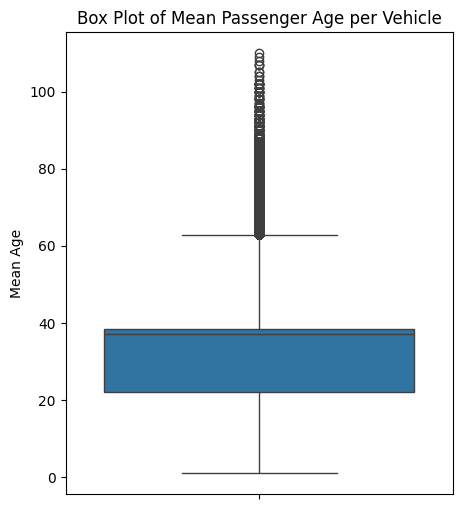

In [147]:
plt.figure(figsize=(5, 6))
sns.boxplot(y=passengers['MEAN_AGE'])

plt.title('Box Plot of Mean Passenger Age per Vehicle')
plt.ylabel('Mean Age')

plt.show()

From the chart, we find that the general average age of passengers is between 20 and 40 years.
The presence of a number of outliers indicates the presence of passengers over 60 years of age, which could be the result of multiple factors such as the presence of older individuals in the vehicle or accidents involving older passengers frequently.

### [iv]

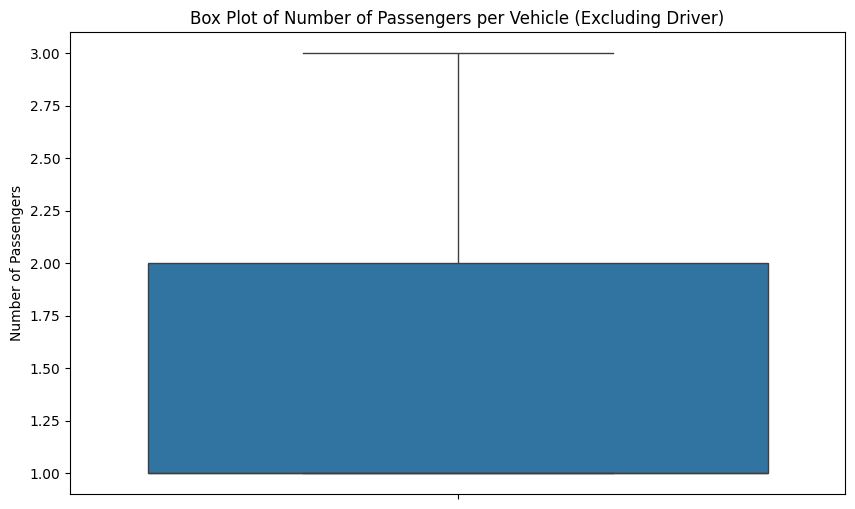

In [148]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=passenger_counts, showfliers=False)


plt.title('Box Plot of Number of Passengers per Vehicle (Excluding Driver)')
plt.ylabel('Number of Passengers')

plt.show()

The majority of vehicles contain between 1 and 2 passengers.
There are a few anomalies where the number of passengers is abnormally high, up to 60 passengers in some cases.
This indicates that most vehicles contain a small number of passengers, except for some rare cases in which the number is unusually large.

### [v]

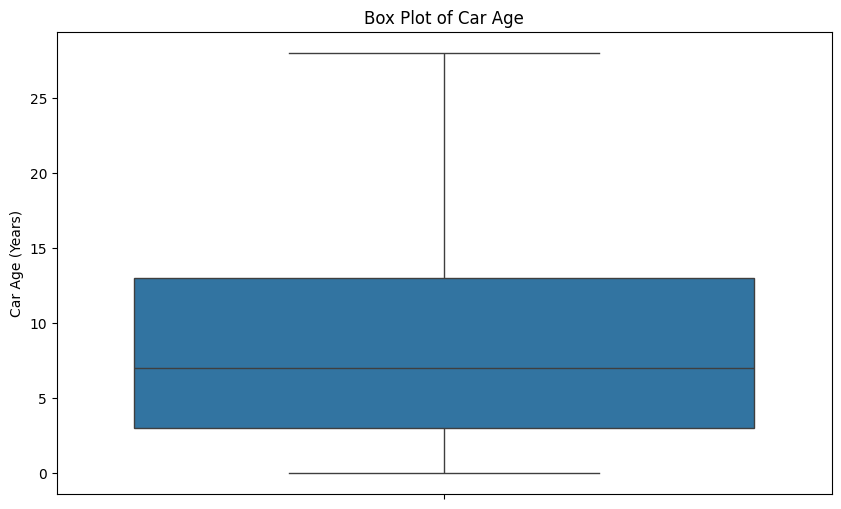

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=crashes_vehicles['YEAR_DIFF'] , showfliers=False)

plt.title('Box Plot of Car Age')
plt.ylabel('Car Age (Years)')


plt.show()


This analysis shows that the vast majority of cars are between 1 and 20 years old, with a very small number of older cars being outliers.

## [e] Outlier Detection

### [i]

To identify extreme or bizarre traffic accidents, we can use statistical methods such as using outliers in the data. One common approach is to use the 1.5×IQR rule to identify outliers

1. Explore the Primary Cause column (PRIM_CONTRIBUTORY_CAUSE)
We start by exploring the values in the Main Cause of Accident column:

In [150]:
unique_causes = crashes['PRIM_CONTRIBUTORY_CAUSE'].unique()
print("Unique Primary Contributory Causes:", unique_causes)


Unique Primary Contributory Causes: ['FOLLOWING TOO CLOSELY', 'FAILING TO REDUCE SPEED TO AVOID CRASH', 'UNABLE TO DETERMINE', 'IMPROPER BACKING', 'IMPROPER TURNING/NO SIGNAL', ..., 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGA..., 'OBSTRUCTED CROSSWALKS', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'PASSING STOPPED SCHOOL BUS', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT']
Length: 40
Categories (40, object): ['ANIMAL', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'CELL PHONE USE OTHER THAN TEXTING', 'DISREGARDING OTHER TRAFFIC SIGNS', ..., 'UNABLE TO DETERMINE', 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHE..., 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS..., 'WEATHER']


2. Create a Box Chart based on the root cause
We create a Box Chart for each root cause to find out the distribution of incidents and detect outliers.

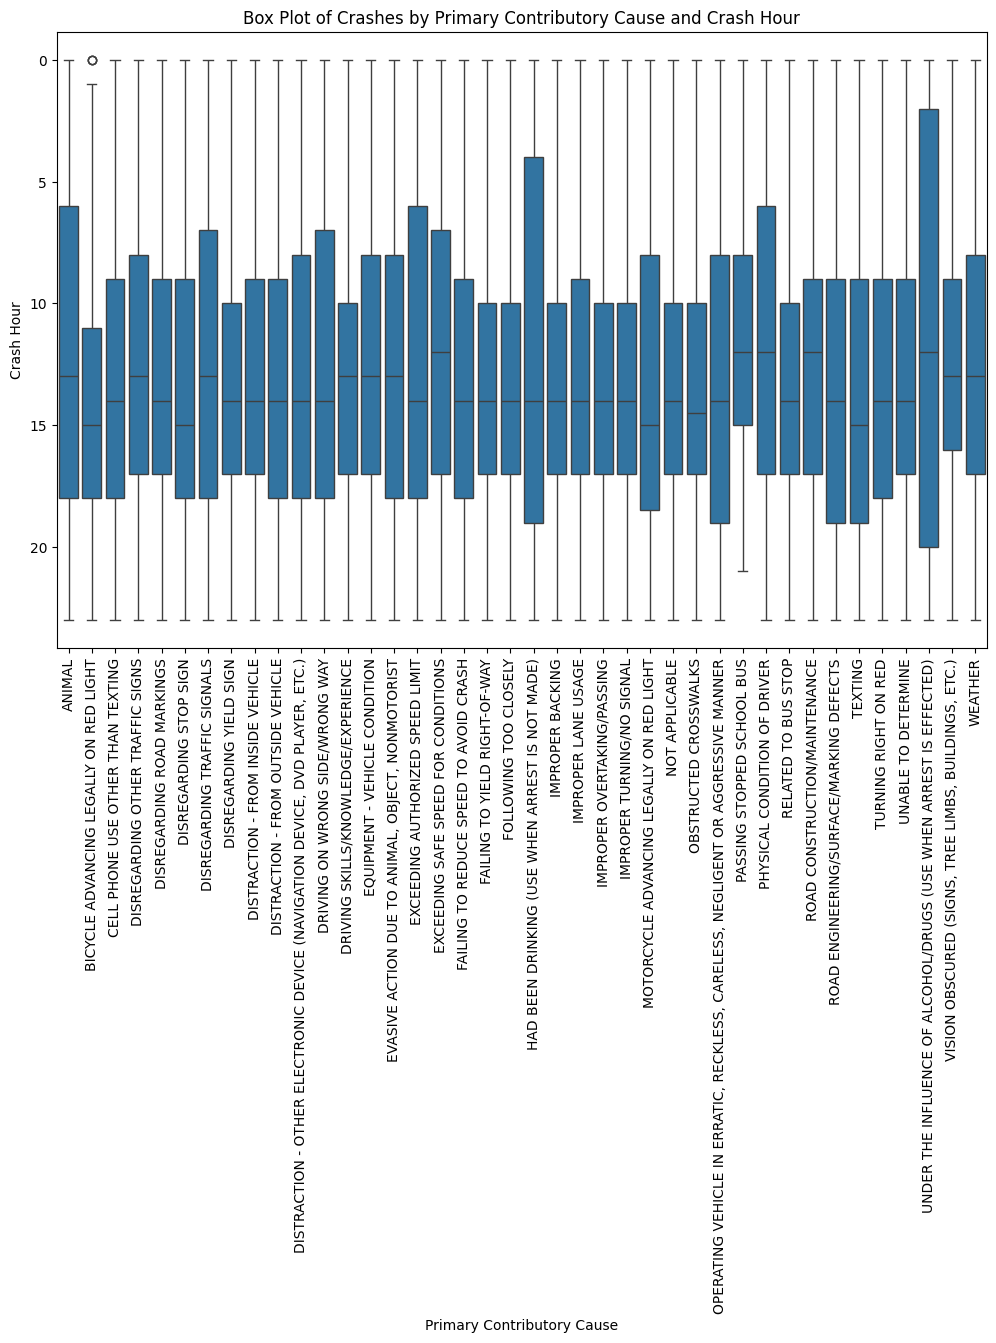

In [151]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PRIM_CONTRIBUTORY_CAUSE', y='CRASH_HOUR', data=crashes)
plt.title('Box Plot of Crashes by Primary Contributory Cause and Crash Hour')
plt.xticks(rotation=90)
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Crash Hour')
plt.show()

3. Definition of extreme incidents
We use statistical analysis to identify outliers based on values that exceed the boundaries of the Box chart.

In [152]:
Q1 = crashes.groupby('PRIM_CONTRIBUTORY_CAUSE')['CRASH_HOUR'].quantile(0.25)
Q3 = crashes.groupby('PRIM_CONTRIBUTORY_CAUSE')['CRASH_HOUR'].quantile(0.75)
IQR = Q3 - Q1

def is_outlier(row):
    q1 = Q1[row['PRIM_CONTRIBUTORY_CAUSE']]
    q3 = Q3[row['PRIM_CONTRIBUTORY_CAUSE']]
    iqr = IQR[row['PRIM_CONTRIBUTORY_CAUSE']]
    return row['CRASH_HOUR'] < (q1 - 1.5 * iqr) or row['CRASH_HOUR'] > (q3 + 1.5 * iqr)

outliers = crashes[crashes.apply(is_outlier, axis=1)]
print("Number of Outlier Crashes:", len(outliers))


C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\322287085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Q1 = crashes.groupby('PRIM_CONTRIBUTORY_CAUSE')['CRASH_HOUR'].quantile(0.25)
C:\Users\VIOLET\AppData\Local\Temp\ipykernel_10788\322287085.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Q3 = crashes.groupby('PRIM_CONTRIBUTORY_CAUSE')['CRASH_HOUR'].quantile(0.75)


Number of Outlier Crashes: 3


4. Exploring the causes of extreme incidents
We analyze the possible causes of accident extremes based on available data

Columns in outliers: Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'CRASH_YEAR', 'VEHICLE_CLASSES', 'VEHICLE_CLASSES_BINNED', 'Geohash',
       'AccidentCount', 'AccidentCount_Category', 'Length_Category',
       'DistanceFromCBD', 'DistanceFromCBD_Category', 'WithinCBD', 'DISTR

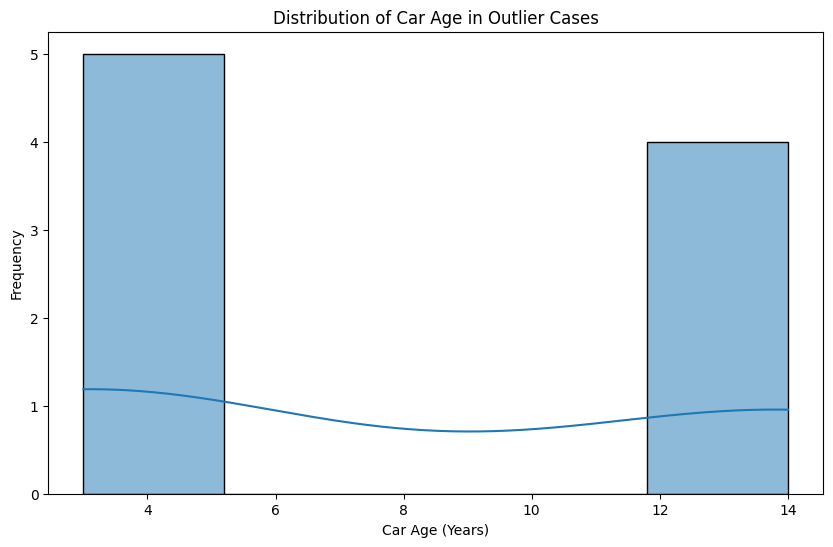

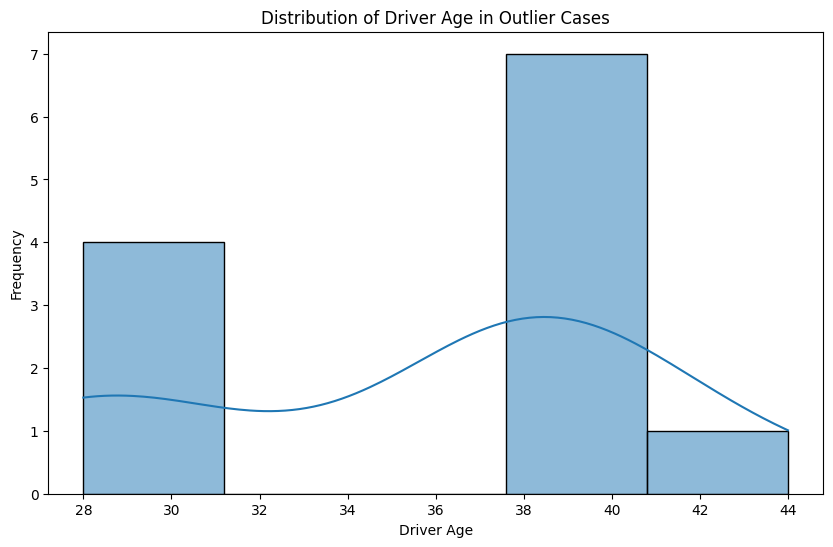

In [153]:
print("Columns in outliers:", outliers.columns)

if 'YEAR_DIFF' not in outliers.columns:
    outliers = outliers.merge(crashes_vehicles[['CRASH_RECORD_ID', 'YEAR_DIFF']], on='CRASH_RECORD_ID', how='left')
if 'AGE' not in outliers.columns:
    outliers = outliers.merge(crashes_people[['CRASH_RECORD_ID', 'AGE']], on='CRASH_RECORD_ID', how='left')

outlier_stats = outliers.describe()

plt.figure(figsize=(10, 6))
sns.histplot(outliers['YEAR_DIFF'], kde=True)
plt.title('Distribution of Car Age in Outlier Cases')
plt.xlabel('Car Age (Years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(outliers['AGE'], kde=True)
plt.title('Distribution of Driver Age in Outlier Cases')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.show()


### [ii]

Causes of extreme accidents:
Unusual timing of accidents:

Accidents that occur at unusual hours may be the result of dangerous or unexpected driving behavior, such as driving late at night or early in the morning when there is fatigue or lack of attention.
Drivers' ages:

The presence of drivers in certain age groups (such as young or elderly) can play a role in the extremity of accidents, due to inexperience or recklessness among young drivers or poor responsiveness among older people.
Car ages:

Old or outdated cars may be more susceptible to breakdowns, increasing the possibility of accidents.
Recommendations:
Improving traffic control:

Intensifying oversight in unusual times and applying strict laws on dangerous behavior.
Drivers' awareness:

Awareness campaigns for drivers about the dangers of driving while tired or under the influence of alcohol or drugs.
Regular maintenance of vehicles:

Encouraging drivers to regularly maintain their vehicles to ensure their readiness and reduce the possibility of breakdowns.
Infrastructure enhancement:

Improving roads and infrastructure to reduce environmental factors that may contribute to accidents, such as road lighting and improving traffic signs.

# Question [4]: Do What you Have to Do

While answering the questions after cleaning the data we noticed some extra observasions that we can apply to accurate our data.  
For ex:
when we tried to draw the box plot for  count of passengers per vehicle we noticed that there are many un logical values for ex: in some vehicle we foundthat there are more than 6 passengers have the SEAT_NO 7 😁🤣 it seems these passengers are babies or love each other too much so they were haging each other in the Seat 7 :)

LETS DIVE IN AND SAY YA GOD 

In [154]:
un_logical_values=[value for value in passenger_counts.values if value >20]
set(un_logical_values)

{21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 33, 34, 35, 36, 39, 43, 59}

we suposed that the max passenger count in avehicle is 20 that means it's acommon transportaion such as buses and we can see that there are vehicles  can reach 59 passengers it's the (GREEN BUS)!!!!  

lets take the vehicles who has passengers count more than 20 and try to look at SEAT_NO column to see what happend there

In [155]:
vehicles_more_20_pass= [key for key in passenger_counts.keys() if passenger_counts[key]>20]
print(vehicles_more_20_pass[0:5])
# lets take the rows from crashes_vehicles 
# that are the same vehicles with the firs five vehicles in vehicles_more_20_pass array

result=crashes_people[(crashes_people["VEHICLE_ID"].isin(vehicles_more_20_pass[0:5]))]

# lets look at seat_no and person_type in vehicle_id == 20937.0
vehicle=result[result["VEHICLE_ID"]==20937.0]
vehicle.head(15)

[20937.0, 100884.0, 129409.0, 162199.0, 229348.0]


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
634924,O21739,DRIVER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,0.0,BELLWOOD,M,36.000000,IL,B,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,OTHER,NOT OBSCURED,NORMAL,TEST NOT OFFERED
1291420,P4033,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,M,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291441,P4035,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,6.0,CHICAGO,F,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291452,P4037,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291461,P4038,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291472,P4039,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291483,P4040,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291494,P4041,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291504,P4042,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291515,P4043,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,X,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER


we can see that there are many people has the same SEAT_NO 5 most of the is of X sex and one of them of known SEX (M) lets try ot remove the passenger of SEX X and see what will happen

In [156]:
vehicle=vehicle[vehicle["SEX"]!="X"]
vehicle

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
634924,O21739,DRIVER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,0.0,BELLWOOD,M,36.000000,IL,B,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,OTHER,NOT OBSCURED,NORMAL,TEST NOT OFFERED
1291420,P4033,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,M,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291441,P4035,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,6.0,CHICAGO,F,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1303743,P4034,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,M,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER


Now it's more logical but still found two people in the same SEAT with the same SEX and the same age so let's drop duplicated on the (AGE,SEX and SEAT_NO)

In [157]:
vehicle=vehicle.drop_duplicates(subset=["AGE","SEX","SEAT_NO"])
vehicle

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
634924,O21739,DRIVER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,0.0,BELLWOOD,M,36.000000,IL,B,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,OTHER,NOT OBSCURED,NORMAL,TEST NOT OFFERED
1291420,P4033,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,5.0,CHICAGO,M,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER
1291441,P4035,PASSENGER,4b22c1945b9ee29aef685cd2d921259e254a271e193da0...,20937.0,01/07/2016 01:15:00 PM,6.0,CHICAGO,F,38.333701,NOT REQUIRED,NOT REQUIRED,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER,IS_NOT_DRIVER


let's try to generalize those steps on the 5 vehicles and see if the results make sence then generalize for all the data

In [158]:
grouped=result.groupby(['VEHICLE_ID', 'PERSON_TYPE','SEAT_NO'])['SEX'].value_counts()
print(grouped)
result_uniq = result.drop_duplicates(subset=['SEAT_NO', 'SEX'], keep='first')
grouped=result_uniq.groupby(['VEHICLE_ID', 'PERSON_TYPE','SEAT_NO'])['SEX'].value_counts()


VEHICLE_ID  PERSON_TYPE  SEAT_NO  SEX
20937.0     DRIVER       0.0      M       1
            PASSENGER    5.0      X      22
                                  M       2
                         6.0      F       1
100884.0    DRIVER       0.0      F       1
            PASSENGER    7.0      X      36
129409.0    DRIVER       0.0      M       1
            PASSENGER    4.0      X      12
                         6.0      X      13
162199.0    DRIVER       0.0      M       1
            PASSENGER    1.0      M       1
                         2.0      F       2
                                  X       1
                         3.0      F       2
                                  X       1
                         4.0      F       2
                                  M       1
                                  X       1
                         5.0      F       4
                                  X       3
                         6.0      M       2
                                  X   

In [159]:
print(grouped)

VEHICLE_ID  PERSON_TYPE  SEAT_NO  SEX
20937.0     PASSENGER    5.0      M      1
                         6.0      F      1
100884.0    DRIVER       0.0      F      1
            PASSENGER    7.0      X      1
129409.0    DRIVER       0.0      M      1
            PASSENGER    4.0      X      1
                         6.0      X      1
162199.0    PASSENGER    1.0      M      1
                         2.0      F      1
                                  X      1
                         3.0      F      1
                                  X      1
                         4.0      F      1
                                  M      1
                         5.0      F      1
                                  X      1
                         6.0      M      1
                         7.0      M      1
                         8.0      F      1
                                  X      1
                         10.0     F      1
                                  X      1
                

In [160]:
crashes_people=crashes_people.drop_duplicates(subset=["VEHICLE_ID","PERSON_TYPE","SEAT_NO"])
passengers=crashes_people[crashes_people["PERSON_TYPE"]=="PASSENGER"]
passenger_counts = passengers.groupby('VEHICLE_ID').size()
print("min passenger_count:",passenger_counts.min())
print("max passenger_count:",passenger_counts.max())

min passenger_count: 1
max passenger_count: 11


NOW it's logical that the min PASSENGER count is 1 and the max is 11.

The end of the notebook, hoping it gets your likes.  
Thanl you for reading